<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="Telecomchurn.jpg">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>Telecom Churn Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Data Definition:

    
**CUSTOMER-ID**                -  customer id

**GENDER**                      -  client gender (male / female)

**SENIOR CITIZEN**              -  is the client retired (1, 0)

**PARTNER**                     -  is the client married (Yes, No)

**TENURE**                        - how many months a person has been a client of the company

**PHONE SERVICE**         - is the telephone service connected (Yes, No)

**MULTIPLE LINES**          - are multiple phone lines connected (Yes, No, No phone service)

**INTERNET SERVICE**     - client's Internet service provider (DSL, Fiber optic, No)

**ONLINE SECURITY**       - is the online security service connected (Yes, No, No internet service)

**ONLINE BACKUP**         - is the online backup service activated (Yes, No, No internet service)

**DEVICEPROTECTION**   - does the client have equipment insurance (Yes, No, No internet service)

**TECH SUPPORT**            - is the technical support service connected (Yes, No, No internet service)

**STREAMING TV**              - is the streaming TV service connected (Yes, No, No internet service)

**STREAMING MOVIES**    - is the streaming cinema service activated (Yes, No, No internet service)

**CONTRACT**                    - type of customer contract (Month-to-month, One year, Two year)

**PAPERLESS BILLING**    - whether the client uses paperless billing (Yes, No)

**PAYEMENT METHOD**    - Electronic check, Mailed check, Bank transfer (automatic), Credit   card (automatic)

**MONTHLY CHARGES**     - current monthly payment

**TOTAL CHARGES**         - the total amount that the client paid for the services for the entire time

**CHURN**                           - whether there was a churn (Yes or No)




# Libraries used:

In [1]:
# import 'Pandas' for data manupulation
import pandas as pd 

# import 'Numpy' for arithmetical operations
import numpy as np

# import subpackage of Matplotlib for visualization
import matplotlib.pyplot as plt

# import 'Seaborn'  for advanced visualization
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot #to check normality
from statsmodels.stats.anova import anova_lm     # to identify whether the model is significant or not
from statsmodels.formula.api import ols          #to build the Regression Model
from statsmodels.tools.eval_measures import rmse

# import function to perform linear regression and for Lasso, Ridge and Elastic-net
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

#import function to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#import function to perform gridsearch-cv
from sklearn.model_selection import GridSearchCV


# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 1.Loading the data:

<table align="left">
    <tr>
        <td width="8%">
            <img src="read data capstone1.jpg">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Read and display data to get insights from the data<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [2]:
data=pd.read_csv('telecom_users.csv')
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.100000,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.150000,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.950000,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.900000,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.450000,119.5,No


# 2. Data Analysis and Preparation

<table align="left">
    <tr>
        <td width="8%">
            <img src="data-cleansing-and-mining-data-cleaning capstone.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Data preparation is the process of cleaning and transforming raw data prior to building predictive models. <br><br>
                        Here we will analyze and prepare data to perform regression analysis:<br>
                        1. Check dimensions of the dataframe in terms of rows and columns <Br>
                        2. Check the data types.If data types are not as per business context, change it as per requirement<br>
                        3. Study summary statistics<br>
                        4. Check for missing values<br>
                        5. Check for outliers<br>
                        6. Seperation of categorical and continuous columns<br>
                        7. Study correlation<br>
                        8. Univariate analysis<br>
                        9. Bivariate analysis<br>
                        10. Statistical analysis<br>
                        11. Encoding categorical variables.<br>
                        12. Scaling numerical variables.<br>
                        13. Seperating the dependent(y) and independent (x) variables.<br>
                        14. Train-Test-Split<br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### 2.1 Data Dimension

To know the dimensions of the data:

In [3]:
# .shape returns the dimension of the data
data.shape

(5986, 22)

We see the dataframe has 22 columns and 5986 observations.


### 2.2 Data Types
Data has a variety of data types. The main types stored in pandas dataframes are object, float, int64, bool and datetime64. In order to learn about each attribute, it is always good for us to know the data type of each column.

<table align="left">
    <tr>
        <td width="8%">
            <img src="read data capstone1.jpg">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> In this section we will: <br>  
                        1. Check data types<br>
                        2. Change the incorrect data types<br>
                        3. Recheck the data types after the conversion
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Check data types**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


**INTERPRETATION:**

*From the data we conclude that the variable 'customerID' is unique and we set it as index.

*Also the variable 'Unnamed: 0' is not useful in predicting the churn. Hence we dropped it.

In [5]:
data = data.set_index(data['customerID'])
data.drop('customerID', axis = 1, inplace = True)
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.100000,1734.65,No
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.150000,3973.2,No
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.950000,2869.85,Yes


**2. Change the incorrect data types**

In [6]:
print('seniorcitizen:',data['SeniorCitizen'].nunique())
print('TotalCharges:',data['TotalCharges'].nunique())

seniorcitizen: 2
TotalCharges: 5611


In [7]:
data['TotalCharges'].unique()

array(['1734.65', '3973.2', '2869.85', ..., '306.05', '1200.15', '457.3'],
      dtype=object)

**INTERPRETATION:** 

*Here, variable 'seniorcitizen' has only two values 0 & 1. Also the variable 'TotalCharges' has a complete numerical values.

*Hence we treat 'seniorcitizen' as object type and 'TotalCharges' as float type.

In [8]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype(object)

In [9]:
data['TotalCharges']= data['TotalCharges'].replace(' ', np.nan, regex=True)

In [10]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [11]:
# 10 null values are there in TotalCharges. We convert it to float type and filling those null values.

In [12]:
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [13]:
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].mean())

**3. Recheck the data types after the conversion**

In [14]:
data.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
#Here we converted the columns 'SeniorCitizen'(int) and 'TotalCharges'(obj) into categorical and numerical respectively.

### 2.3 Summary Statistics

<table align="left">
    <tr>
        <td width="8%">
            <img src="read data capstone1.jpg">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> In our dataset we have numerical and categorical variables. Now we check for summary statistics of all the variables<br>
                        1. For numerical variables, we use .describe()<br>
                        2. For categorical features, we use .describe(include=object) <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. For numerical variables, we use .describe()**

In [16]:
# describe the numerical data
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000
mean,32.468760,64.802213,2298.060617
std,24.516391,30.114702,2272.226516
min,0.000000,18.250000,18.800000
25%,9.000000,35.650000,406.275000
50%,29.000000,70.400000,1414.550000
75%,56.000000,89.900000,3841.500000
max,72.000000,118.750000,8684.800000


<table align="left">
    <tr>
        <td width="8%">
            <img src="read data capstone1.jpg">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
<b>The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.
<br>
         Note, the average Monthly charges is 64.8 and the average Total charges is 2298.06. Here the mean of tenure is 32.468<br><br>
    If we observe the count of all the variables, they are equal. This represents that there are no null values.</b>     </font>
            </div>
        </td>
    </tr>
</table>

**2. For categorical features, we use .describe(include=object)**

In [17]:
# describe the categorical data
# include=object: selects the categorical features
data.describe(include = object)

# Note: If we pass 'include=object' to the .describe(),
#       it will return descriptive statistics for categorical variables only

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3050,5020,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


<table align="left">
    <tr>
        <td width="8%">
            <img src="read data capstone1.jpg">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The summary statistics for categorical variables can be interpreted as:<br><br>
       count   - Total number of observations<br>
       unique  - Number of unique classes in a variable<br>
       top     - The most repeated class<br>
       freq    - Frequency of most repeated class<br><br>
       Here also we can see that the count for all the variables are equal. This represents that there are no null values.<br>
                </font>
            </div>
        </td>
    </tr>
</table>

### 2.4 Missing Values

<table align="left">
    <tr>
        <td width="8%">
            <img src="read data capstone1.jpg">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to get the count of missing values in each column, we use the in-built function .isnull().sum()
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# 'ascending = False' sorts values in the descending order,the variable with highest number of missing values will appear first
Total = data.isnull().sum().sort_values(ascending=False) 

# the variable with highest percentage of missing values will appear first
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# keys:pass a list of column names in parameter  
# axis = 1: concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

# print the missing data
missing_data

,Total,Percentage of Missing Values
Churn,0,0.000000
TotalCharges,0,0.000000
SeniorCitizen,0,0.000000
Partner,0,0.000000
Dependents,0,0.000000
tenure,0,0.000000
PhoneService,0,0.000000
MultipleLines,0,0.000000
InternetService,0,0.000000
OnlineSecurity,0,0.000000


There are no missing values.

### 2.5 Seperation of categorical and continuous columns

In [19]:
num_data=data.select_dtypes(include=np.number)
cat_data=data.select_dtypes(exclude=np.number)

In [20]:
num_data.head()

,tenure,MonthlyCharges,TotalCharges
customerID,,,
7010-BRBUU,72,24.100000,1734.650000
9688-YGXVR,44,88.150000,3973.200000
9286-DOJGF,38,74.950000,2869.850000
6994-KERXL,4,55.900000,238.500000
2181-UAESM,2,53.450000,119.500000


In [21]:
cat_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
customerID,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),No
9688-YGXVR,Female,0,No,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),No
9286-DOJGF,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),Yes
6994-KERXL,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,No
2181-UAESM,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,No


In [22]:
cat_data.shape

(5986, 17)

In [23]:
for i in cat_data.columns:
    print(cat_data[i].value_counts())
    print(50*'*')
    print(cat_data[i].value_counts(normalize=True))
    print(50*'-')

Male      3050
Female    2936
Name: gender, dtype: int64
**************************************************
Male     0.509522
Female   0.490478
Name: gender, dtype: float64
--------------------------------------------------
0    5020
1     966
Name: SeniorCitizen, dtype: int64
**************************************************
0   0.838623
1   0.161377
Name: SeniorCitizen, dtype: float64
--------------------------------------------------
No     3082
Yes    2904
Name: Partner, dtype: int64
**************************************************
No    0.514868
Yes   0.485132
Name: Partner, dtype: float64
--------------------------------------------------
No     4195
Yes    1791
Name: Dependents, dtype: int64
**************************************************
No    0.700802
Yes   0.299198
Name: Dependents, dtype: float64
--------------------------------------------------
Yes    5396
No      590
Name: PhoneService, dtype: int64
**************************************************
Yes   0.901437
N

### 2.6 Outlier Treatment

**Importance of detecting an outlier:**

An outlier is an observation that appears to deviate distinctly from other observations in the data.If the outliers are not removed, the model accuracy may decrease.

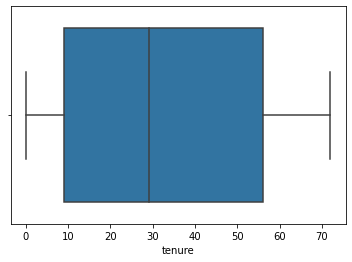

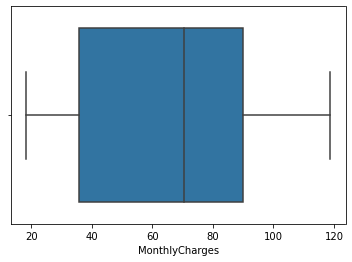

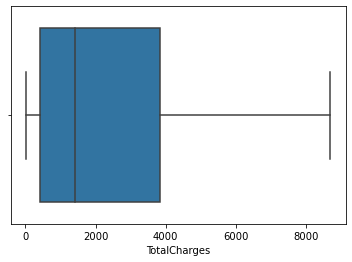

In [24]:
for i in num_data:
    sns.boxplot(data[i])
    plt.show()

There are no outliers.

### 2.7 Correlation

<ul>
    <li>Correlation is the extent of linear relationship among numeric variables</li>
    <li>It indicates the extent to which two variables increase or decrease in parallel</li>
    <li>The value of a correlation coefficient ranges between -1 and 1</li>
    <li> Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which pairs are correlated</li>
    </ul>
    

**Call the corr() function which will return the correlation matrix of numeric variables**

In [25]:
corr =  num_data.corr()

# print the correlation matrix
corr

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.256983,0.826223
MonthlyCharges,0.256983,1.000000,0.655830
TotalCharges,0.826223,0.655830,1.000000


**Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix**

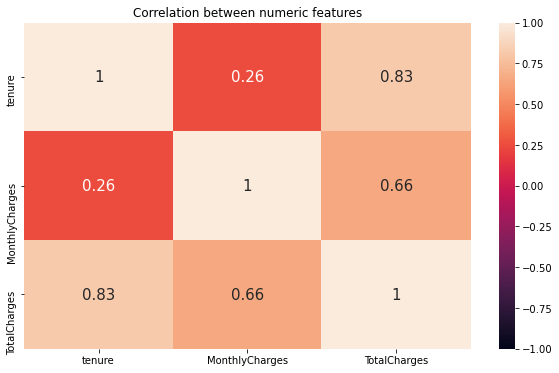

In [26]:
# set the figure size
plt.figure(figsize=(10, 6))

# plot the heat map
# corr: give the correlation matrix
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: Sets the font size of the annotation
sns.heatmap(corr, vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15}, )

# specify name of the plot using plt.title()
plt.title('Correlation between numeric features')

# display the plot
plt.show()

It can be observed that the numeric variables Totalcharges and tenure are correlated with each other. 

### 2.8 Univariate analysis:

### Continous columns:

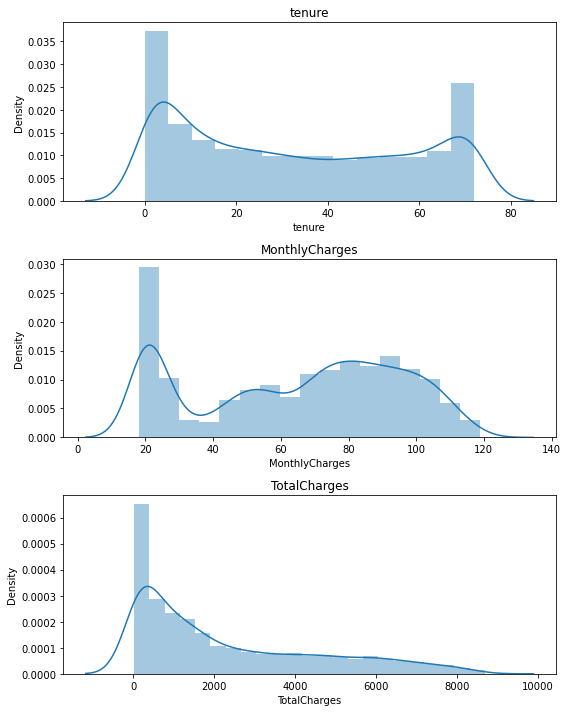

In [27]:
row  =3
col =1
count=1
plt.figure(figsize=(8,10))
for i in num_data:
    plt.subplot(row,col,count)
    plt.title(i)
    sns.distplot(num_data[i])
    count=count+1
plt.tight_layout()
plt.show()

The column Totalcharges is rightly skewed.

In [28]:
num_data.skew()

tenure            0.233822
MonthlyCharges   -0.218678
TotalCharges      0.950357
dtype: float64

### Caterogrical columns:

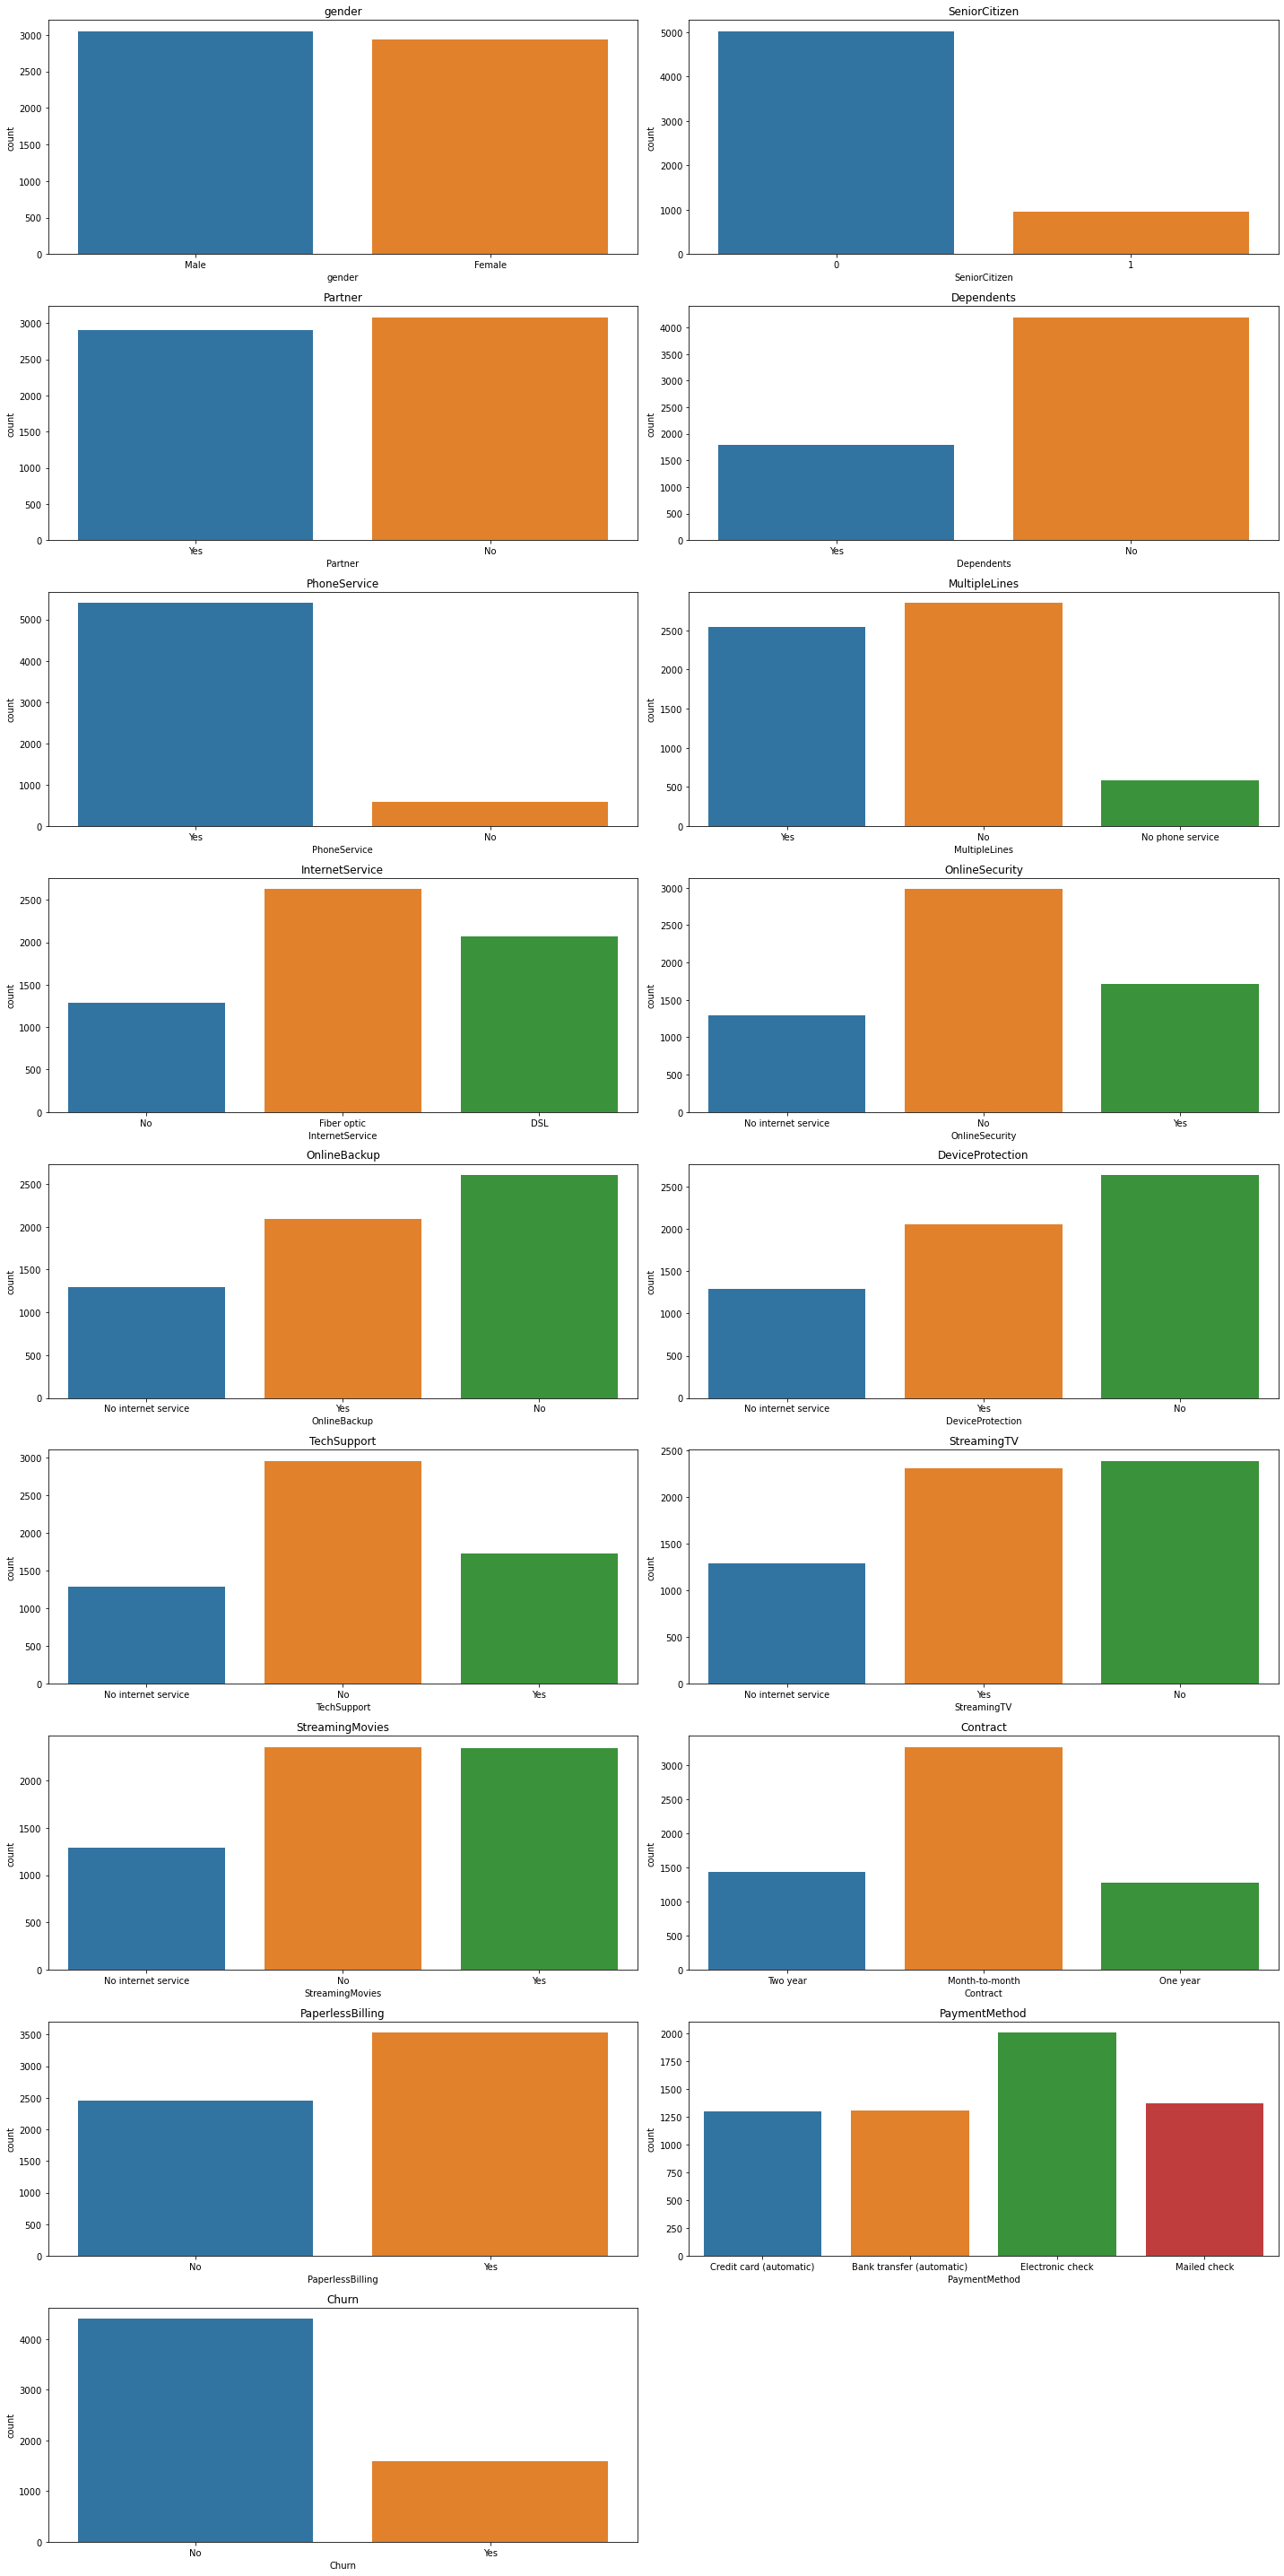

In [29]:
row  =9
col =2
count=1
plt.figure(figsize=(20,40))
for i in cat_data:
    plt.subplot(row,col,count)
    plt.title(i)
    sns.countplot(cat_data[i])
    count=count+1
plt.tight_layout()
plt.show()

### 2.9 Bivariate Analysis

In [30]:
# numerical vs Taget
# Target - Churn(categroical)

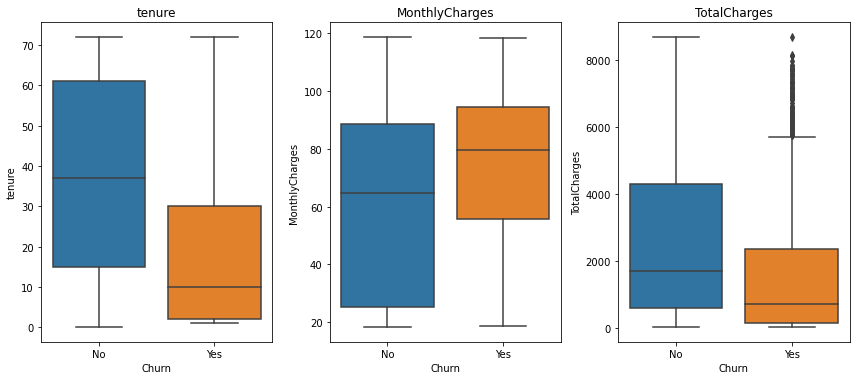

In [31]:
row  =3
col =3
count=1
plt.figure(figsize=(12,15))
for i in num_data:
    plt.subplot(row,col,count)
    plt.title(i)
    sns.boxplot(x='Churn',y=i,data=data)
    count=count+1
plt.tight_layout()
plt.show()

In [32]:
# Categorical vs Taget
# Target - Churn(categroical)

<Figure size 864x720 with 0 Axes>

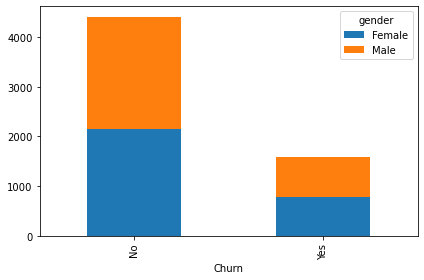

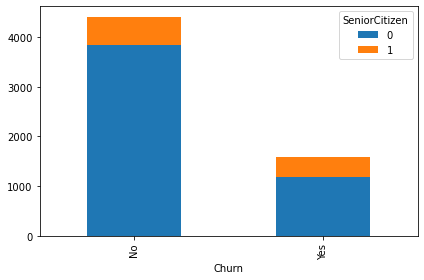

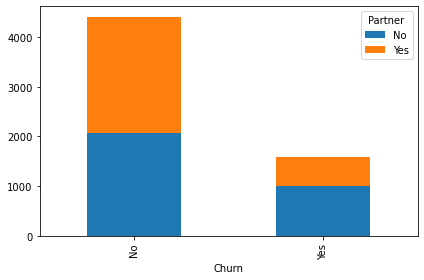

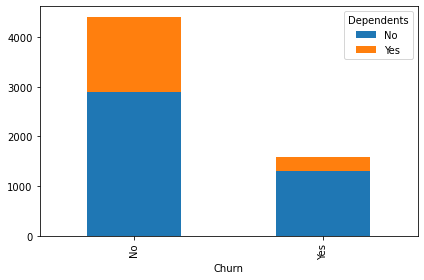

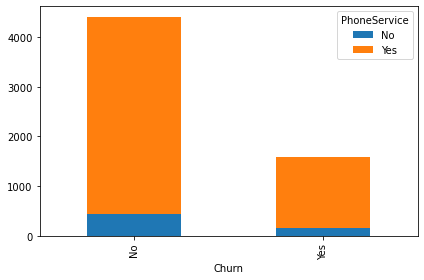

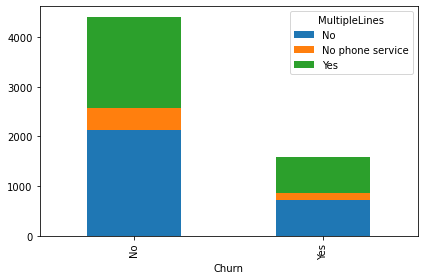

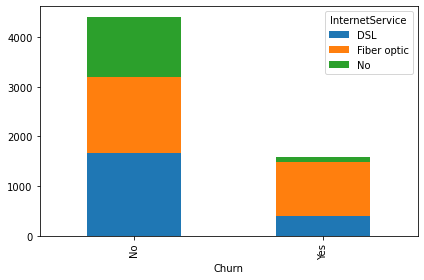

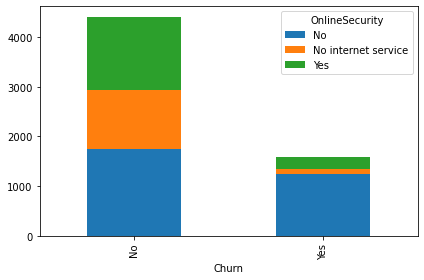

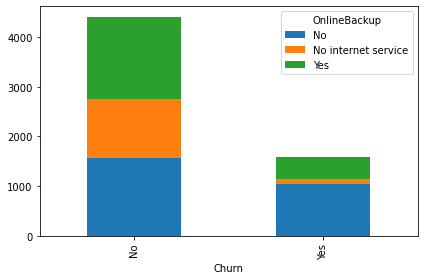

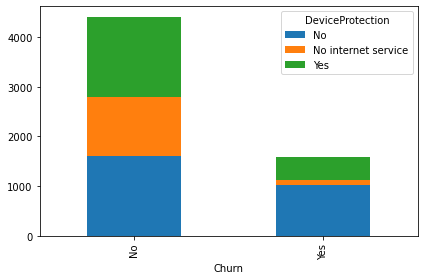

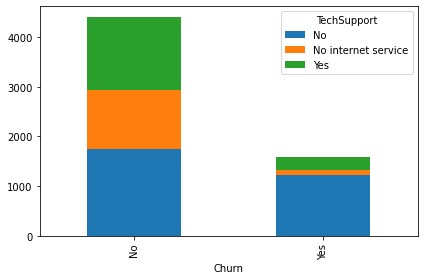

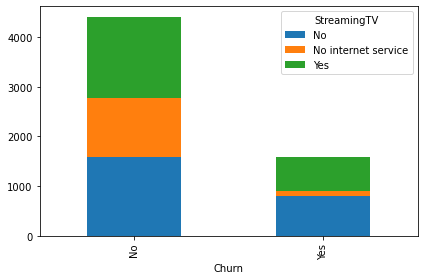

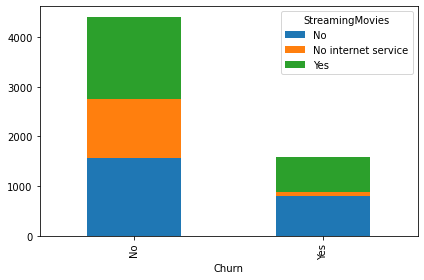

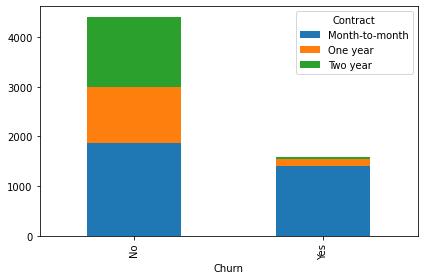

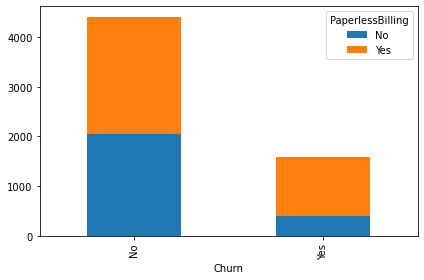

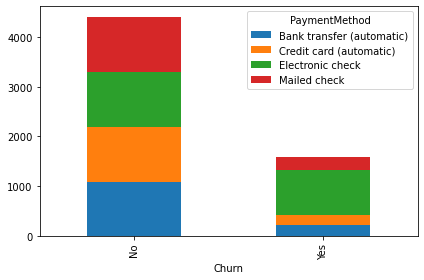

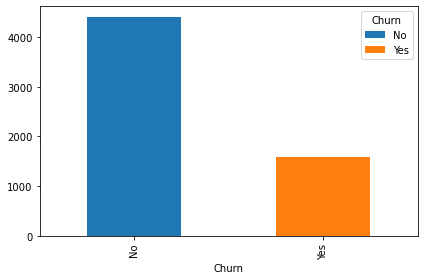

In [33]:
plt.figure(figsize=(12,10))
for i in cat_data:
    pd.crosstab(data['Churn'],data[i]).plot.bar(stacked=True)
    count+=1
    plt.tight_layout()
    plt.show()

### 2.10 Statistical Analysis

In [34]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.100000,1734.650000,No
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.150000,3973.200000,No
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.950000,2869.850000,Yes
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.900000,238.500000,No
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.450000,119.500000,No


In [35]:
gender=data[['gender' , 'Churn']]
gender.head()

,gender,Churn
customerID,,
7010-BRBUU,Male,No
9688-YGXVR,Female,No
9286-DOJGF,Female,Yes
6994-KERXL,Male,No
2181-UAESM,Male,No


In [36]:
obs=pd.crosstab(data['gender'],data['Churn'])

In [37]:
obs

Churn,No,Yes
gender,,
Female,2145,791
Male,2254,796


In [38]:
tstat,pval,dof,exp_tab=stats.chi2_contingency(obs ,correction = False)
print('teststat:',tstat)
print('pvalue:',pval)
print('degrees of freedom:',dof)
print('expected table:',exp_tab)

teststat: 0.5457262028252848
pvalue: 0.46006924275222993
degrees of freedom: 1
expected table: [[2157.61176078  778.38823922]
 [2241.38823922  808.61176078]]


In [39]:
##==================================================================================================================

In [40]:
SeniorCitizen=data[['SeniorCitizen' , 'Churn']]
SeniorCitizen.head()

,SeniorCitizen,Churn
customerID,,
7010-BRBUU,0,No
9688-YGXVR,0,No
9286-DOJGF,1,Yes
6994-KERXL,0,No
2181-UAESM,0,No


In [41]:
obs1=pd.crosstab(data['SeniorCitizen'],data['Churn'])

In [42]:
obs1

Churn,No,Yes
SeniorCitizen,,
0,3835,1185
1,564,402


In [43]:
tstat,pval,dof,exp_tab=stats.chi2_contingency(obs1 ,correction = False)
print('teststat:',tstat)
print('pvalue:',pval)
print('degrees of freedom:',dof)
print('expected table:',exp_tab)

teststat: 134.8595599348406
pvalue: 3.5436850235674448e-31
degrees of freedom: 1
expected table: [[3689.10457735 1330.89542265]
 [ 709.89542265  256.10457735]]


In [44]:
##==================================================================================================================

In [45]:
partner=data[['Partner' , 'Churn']]
partner.head()

,Partner,Churn
customerID,,
7010-BRBUU,Yes,No
9688-YGXVR,No,No
9286-DOJGF,Yes,Yes
6994-KERXL,No,No
2181-UAESM,No,No


In [46]:
obs2=pd.crosstab(data['Partner'],data['Churn'])

In [47]:
obs2

Churn,No,Yes
Partner,,
No,2071,1011
Yes,2328,576


In [48]:
tstat,pval,dof,exp_tab=stats.chi2_contingency(obs2 ,correction = False)
print('teststat:',tstat)
print('pvalue:',pval)
print('degrees of freedom:',dof)
print('expected table:',exp_tab)

teststat: 129.07006423167286
pvalue: 6.546617640688417e-30
degrees of freedom: 1
expected table: [[2264.9044437  817.0955563]
 [2134.0955563  769.9044437]]


In [49]:
##==================================================================================================================

In [50]:
Dependents=data[['Dependents' , 'Churn']]
Dependents.head()

,Dependents,Churn
customerID,,
7010-BRBUU,Yes,No
9688-YGXVR,No,No
9286-DOJGF,No,Yes
6994-KERXL,No,No
2181-UAESM,No,No


In [51]:
obs3=pd.crosstab(data['Dependents'],data['Churn'])

In [52]:
obs3

Churn,No,Yes
Dependents,,
No,2889,1306
Yes,1510,281


In [53]:
tstat,pval,dof,exp_tab=stats.chi2_contingency(obs3 , correction = False)
print('teststat:',tstat)
print('pvalue:',pval)
print('degrees of freedom:',dof)
print('expected table:',exp_tab)

teststat: 153.63217378853972
pvalue: 2.786852967597448e-35
degrees of freedom: 1
expected table: [[3082.82743067 1112.17256933]
 [1316.17256933  474.82743067]]


In [54]:
##==================================================================================================================

In [55]:
PhoneService=data[['PhoneService' , 'Churn']]
PhoneService.head()

,PhoneService,Churn
customerID,,
7010-BRBUU,Yes,No
9688-YGXVR,Yes,No
9286-DOJGF,Yes,Yes
6994-KERXL,Yes,No
2181-UAESM,Yes,No


In [56]:
obs4=pd.crosstab(data['PhoneService'],data['Churn'])

In [57]:
obs4

Churn,No,Yes
PhoneService,,
No,441,149
Yes,3958,1438


In [58]:
tstat,pval,dof,exp_tab=stats.chi2_contingency(obs4 , correction = False)
print('teststat:',tstat) 
print('pvalue:',pval)
print('degrees of freedom:',dof)
print('expected table:',exp_tab)

teststat: 0.5313256228622687
pvalue: 0.4660500727463577
degrees of freedom: 1
expected table: [[ 433.58002005  156.41997995]
 [3965.41997995 1430.58002005]]


In [59]:
##==================================================================================================================

In [60]:
MultipleLines=data[['MultipleLines' , 'Churn']]
MultipleLines.head()

,MultipleLines,Churn
customerID,,
7010-BRBUU,Yes,No
9688-YGXVR,No,No
9286-DOJGF,Yes,Yes
6994-KERXL,No,No
2181-UAESM,No,No


In [61]:
obs5=pd.crosstab(data['MultipleLines'],data['Churn'])

In [62]:
obs5

Churn,No,Yes
MultipleLines,,
No,2133,715
No phone service,441,149
Yes,1825,723


In [63]:
tstat,pval,dof,exp_tab=stats.chi2_contingency(obs5 , correction = False)
print('teststat:',tstat)
print('pvalue:',pval)
print('degrees of freedom:',dof)
print('expected table:',exp_tab)

teststat: 7.91152503084793
pvalue: 0.019144065337666494
degrees of freedom: 2
expected table: [[2092.94219846  755.05780154]
 [ 433.58002005  156.41997995]
 [1872.47778149  675.52221851]]


In [64]:
##==================================================================================================================

In [65]:
InternetService=data[['InternetService' , 'Churn']]
InternetService.head()

,InternetService,Churn
customerID,,
7010-BRBUU,No,No
9688-YGXVR,Fiber optic,No
9286-DOJGF,Fiber optic,Yes
6994-KERXL,DSL,No
2181-UAESM,DSL,No


In [66]:
obs6=pd.crosstab(data['InternetService'],data['Churn'])

In [67]:
obs6

Churn,No,Yes
InternetService,,
DSL,1671,397
Fiber optic,1536,1091
No,1192,99


In [68]:
tstat,pval,dof,exp_tab=stats.chi2_contingency(obs6 , correction = False)
print('teststat:',tstat)
print('pvalue:',pval)
print('degrees of freedom:',dof)
print('expected table:',exp_tab)

teststat: 596.1942893082709
pvalue: 3.451874563052055e-130
degrees of freedom: 2
expected table: [[1519.73471433  548.26528567]
 [1930.53341129  696.46658871]
 [ 948.73187437  342.26812563]]


In [69]:
##==================================================================================================================

In [70]:
OnlineSecurity=data[['OnlineSecurity' , 'Churn']]
OnlineSecurity.head()

,OnlineSecurity,Churn
customerID,,
7010-BRBUU,No internet service,No
9688-YGXVR,No,No
9286-DOJGF,No,Yes
6994-KERXL,No,No
2181-UAESM,Yes,No


In [71]:
obs7=pd.crosstab(data['OnlineSecurity'],data['Churn'])

In [72]:
obs7

Churn,No,Yes
OnlineSecurity,,
No,1740,1242
No internet service,1192,99
Yes,1467,246


In [73]:
tstat,pval,dof,exp_tab=stats.chi2_contingency(obs7, correction = False)
print('teststat:',tstat)
print('pvalue:',pval)
print('degrees of freedom:',dof)
print('expected table:',exp_tab)

teststat: 715.84087021586
pvalue: 3.60686653344072e-156
degrees of freedom: 2
expected table: [[2191.41630471  790.58369529]
 [ 948.73187437  342.26812563]
 [1258.85182092  454.14817908]]


In [74]:
##==================================================================================================================

In [75]:
OnlineBackup=data[['OnlineBackup' , 'Churn']]
OnlineBackup.head()

,OnlineBackup,Churn
customerID,,
7010-BRBUU,No internet service,No
9688-YGXVR,Yes,No
9286-DOJGF,No,Yes
6994-KERXL,No,No
2181-UAESM,No,No


In [76]:
obs8=pd.crosstab(data['OnlineBackup'],data['Churn'])

In [77]:
obs8

Churn,No,Yes
OnlineBackup,,
No,1567,1038
No internet service,1192,99
Yes,1640,450


In [78]:
tstat,pval,dof,exp_tab=stats.chi2_contingency(obs8 , correction = False)
print('teststat:',tstat)
print('pvalue:',pval)
print('degrees of freedom:',dof)
print('expected table:',exp_tab)

teststat: 499.6370333830538
pvalue: 3.2003444505960775e-109
degrees of freedom: 2
expected table: [[1914.36602072  690.63397928]
 [ 948.73187437  342.26812563]
 [1535.90210491  554.09789509]]


In [79]:
##==================================================================================================================

In [80]:
DeviceProtection=data[['DeviceProtection' , 'Churn']]
DeviceProtection.head()

,DeviceProtection,Churn
customerID,,
7010-BRBUU,No internet service,No
9688-YGXVR,Yes,No
9286-DOJGF,No,Yes
6994-KERXL,No,No
2181-UAESM,Yes,No


In [81]:
obs9=pd.crosstab(data['DeviceProtection'],data['Churn'])

In [82]:
obs9

Churn,No,Yes
DeviceProtection,,
No,1609,1031
No internet service,1192,99
Yes,1598,457


In [83]:
tstat,pval,dof,exp_tab=stats.chi2_contingency(obs9 , correction = False)
print('teststat:',tstat)
print('pvalue:',pval)
print('degrees of freedom:',dof)
print('expected table:',exp_tab)

teststat: 467.66226236198463
pvalue: 2.808212905679805e-102
degrees of freedom: 2
expected table: [[1940.08686936  699.91313064]
 [ 948.73187437  342.26812563]
 [1510.18125626  544.81874374]]


In [84]:
##==================================================================================================================

In [85]:
TechSupport=data[['TechSupport' , 'Churn']]
TechSupport.head()

,TechSupport,Churn
customerID,,
7010-BRBUU,No internet service,No
9688-YGXVR,No,No
9286-DOJGF,No,Yes
6994-KERXL,No,No
2181-UAESM,No,No


In [86]:
obs10=pd.crosstab(data['TechSupport'],data['Churn'])

In [87]:
obs10

Churn,No,Yes
TechSupport,,
No,1738,1222
No internet service,1192,99
Yes,1469,266


In [88]:
tstat,pval,dof,exp_tab=stats.chi2_contingency(obs10 , correction = False)
print('teststat:',tstat)
print('pvalue:',pval)
print('degrees of freedom:',dof)
print('expected table:',exp_tab)

teststat: 678.116574926022
pvalue: 5.608628974574772e-148
degrees of freedom: 2
expected table: [[2175.24891413  784.75108587]
 [ 948.73187437  342.26812563]
 [1275.01921149  459.98078851]]


In [89]:
##==================================================================================================================

In [90]:
StreamingTV=data[['StreamingTV' , 'Churn']]
StreamingTV.head()

,StreamingTV,Churn
customerID,,
7010-BRBUU,No internet service,No
9688-YGXVR,Yes,No
9286-DOJGF,No,Yes
6994-KERXL,No,No
2181-UAESM,No,No


In [91]:
obs11=pd.crosstab(data['StreamingTV'],data['Churn'])

In [92]:
obs11

Churn,No,Yes
StreamingTV,,
No,1590,799
No internet service,1192,99
Yes,1617,689


In [93]:
tstat,pval,dof,exp_tab=stats.chi2_contingency(obs11 , correction = False)
print('teststat:',tstat)
print('pvalue:',pval)
print('degrees of freedom:',dof)
print('expected table:',exp_tab)

teststat: 307.63705976625636
pvalue: 1.5756554547823524e-67
degrees of freedom: 2
expected table: [[1755.63164049  633.36835951]
 [ 948.73187437  342.26812563]
 [1694.63648513  611.36351487]]


In [94]:
##==================================================================================================================

In [95]:
StreamingMovies=data[['StreamingMovies' , 'Churn']]
StreamingMovies.head()

,StreamingMovies,Churn
customerID,,
7010-BRBUU,No internet service,No
9688-YGXVR,No,No
9286-DOJGF,No,Yes
6994-KERXL,Yes,No
2181-UAESM,No,No


In [96]:
obs12=pd.crosstab(data['StreamingMovies'],data['Churn'])

In [97]:
obs12

Churn,No,Yes
StreamingMovies,,
No,1564,792
No internet service,1192,99
Yes,1643,696


In [98]:
tstat,pval,dof,exp_tab=stats.chi2_contingency(obs12 , correction = False)
print('teststat:',tstat)
print('pvalue:',pval)
print('degrees of freedom:',dof)
print('expected table:',exp_tab)

teststat: 308.9529634788501
pvalue: 8.160493002875635e-68
degrees of freedom: 2
expected table: [[1731.38055463  624.61944537]
 [ 948.73187437  342.26812563]
 [1718.887571    620.112429  ]]


In [99]:
##==================================================================================================================

In [100]:
Contract=data[['Contract' , 'Churn']]
Contract.head()

,Contract,Churn
customerID,,
7010-BRBUU,Two year,No
9688-YGXVR,Month-to-month,No
9286-DOJGF,Month-to-month,Yes
6994-KERXL,Month-to-month,No
2181-UAESM,Month-to-month,No


In [101]:
obs13=pd.crosstab(data['Contract'],data['Churn'])

In [102]:
obs13

Churn,No,Yes
Contract,,
Month-to-month,1871,1398
One year,1128,148
Two year,1400,41


In [103]:
tstat,pval,dof,exp_tab=stats.chi2_contingency(obs13, correction = False)
print('teststat:',tstat)
print('pvalue:',pval)
print('degrees of freedom:',dof)
print('expected table:',exp_tab)

teststat: 1003.1751885538325
pvalue: 1.4563830453693763e-218
degrees of freedom: 2
expected table: [[2402.32726362  866.67273638]
 [ 937.70865352  338.29134648]
 [1058.96408286  382.03591714]]


In [104]:
##==================================================================================================================

In [105]:
PaperlessBilling=data[['PaperlessBilling' , 'Churn']]
PaperlessBilling.head()

,PaperlessBilling,Churn
customerID,,
7010-BRBUU,No,No
9688-YGXVR,Yes,No
9286-DOJGF,Yes,Yes
6994-KERXL,Yes,No
2181-UAESM,No,No


In [106]:
obs14=pd.crosstab(data['PaperlessBilling'],data['Churn'])

In [107]:
obs14

Churn,No,Yes
PaperlessBilling,,
No,2052,406
Yes,2347,1181


In [108]:
tstat,pval,dof,exp_tab=stats.chi2_contingency(obs14 , correction = False)
print('teststat:',tstat)
print('pvalue:',pval)
print('degrees of freedom:',dof)
print('expected table:',exp_tab)

teststat: 213.81745035791488
pvalue: 2.0185576055712352e-48
degrees of freedom: 1
expected table: [[1806.3384564  651.6615436]
 [2592.6615436  935.3384564]]


In [109]:
##==================================================================================================================

In [110]:
PaymentMethod=data[['PaymentMethod' , 'Churn']]
PaymentMethod.head()

,PaymentMethod,Churn
customerID,,
7010-BRBUU,Credit card (automatic),No
9688-YGXVR,Credit card (automatic),No
9286-DOJGF,Bank transfer (automatic),Yes
6994-KERXL,Electronic check,No
2181-UAESM,Electronic check,No


In [111]:
obs15=pd.crosstab(data['PaymentMethod'],data['Churn'])

In [112]:
obs15

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1084,224
Credit card (automatic),1105,198
Electronic check,1104,902
Mailed check,1106,263


In [113]:
tstat,pval,dof,exp_tab=stats.chi2_contingency(obs15 , correction = False)
print('teststat:',tstat)
print('pvalue:',pval)
print('degrees of freedom:',dof)
print('expected table:',exp_tab)

teststat: 532.8500087311085
pvalue: 3.623648567257548e-115
degrees of freedom: 3
expected table: [[ 961.224858    346.775142  ]
 [ 957.55045105  345.44954895]
 [1474.17206816  531.82793184]
 [1006.05262279  362.94737721]]


In [114]:
##==================================================================================================================

In [115]:
churn_yes=data[data['Churn']=='Yes']['MonthlyCharges']
churn_no=data[data['Churn']=='No']['MonthlyCharges']

In [116]:
#test of normality
#Ho: skew=0 ,data is normal
#Ha:skew!=0, data is not normal

In [117]:
stats.shapiro(churn_yes)

ShapiroResult(statistic=0.9307577610015869, pvalue=1.7309011878292468e-26)

In [118]:
#pval=0.00, default sig.val=0.05
#pval < sig.val , Ho is selected
#data is not normal

In [119]:
stats.shapiro(churn_no)

ShapiroResult(statistic=0.9130260348320007, pvalue=1.1210387714598537e-44)

In [120]:
#pval=0.00, default sig.val=0.05
#pval < sig.val , Ho is selected
#data is not normal

In [121]:
#both the datas are not normal
#pop std is not known
#unpaired two sample t test (two tailed)

In [122]:
# Ho: mu of churn = mu of Monthly charges.
# Ha: mu of churn_yes != mu of Monthly charges.

In [123]:
tstat,twosided_pval=stats.mannwhitneyu(churn_yes,churn_no)
print('Test_statistic:',tstat)
print('twosided_pval:',twosided_pval)

Test_statistic: 2677182.5
twosided_pval: 1.6167549805054015e-43


In [124]:
#pval=0.00
#sig.val=0.05
#pval< sig.val
#Ha is accepted.
# ?

In [125]:
##==================================================================================================================

In [126]:
churn_yes=data[data['Churn']=='Yes']['TotalCharges']
churn_no=data[data['Churn']=='No']['TotalCharges']

In [127]:
#test of normality
#Ho: skew=0 ,data is normal
#Ha:skew!=0, data is not normal

In [128]:
stats.shapiro(churn_yes)

ShapiroResult(statistic=0.7816087007522583, pvalue=9.869345084239687e-42)

In [129]:
#pval=0.00, default sig.val=0.05
#pval < sig.val , Ho is selected
#data is not normal

In [130]:
stats.shapiro(churn_no)

ShapiroResult(statistic=0.8841422200202942, pvalue=0.0)

In [131]:
#pval=0.00, default sig.val=0.05
#pval < sig.val , Ho is selected
#data is not normal

In [132]:
#both the datas are not normal
#pop std is not known
#unpaired two sample t test (two tailed)

In [133]:
# Ho: mu of churn = mu of Total charges.
# Ha: mu of churn_yes != mu of Total charges.

In [134]:
tstat,twosided_pval=stats.mannwhitneyu(churn_yes,churn_no)
print('Test_statistic:',tstat)
print('twosided_pval:',twosided_pval)

Test_statistic: 2433091.5
twosided_pval: 4.212513847218339e-72


In [135]:
#pval=0.00
#sig.val=0.05
#pval< sig.val
#Ha is accepted.
# ?

In [136]:
##==================================================================================================================

In [137]:
churn_yes=data[data['Churn']=='Yes']['tenure']
churn_no=data[data['Churn']=='No']['tenure']

In [138]:
#test of normality
#Ho: skew=0 ,data is normal
#Ha:skew!=0, data is not normal

In [139]:
stats.shapiro(churn_yes)

ShapiroResult(statistic=0.8234317302703857, pvalue=1.226073658372706e-38)

In [140]:
#pval=0.00, default sig.val=0.05
#pval < sig.val , Ho is selected
#data is not normal

In [141]:
stats.shapiro(churn_no)

ShapiroResult(statistic=0.9181919097900391, pvalue=1.0229478789571165e-43)

In [142]:
#pval=0.00, default sig.val=0.05
#pval < sig.val , Ho is selected
#data is not normal

In [143]:
#both the datas are not normal
#pop std is not known
#unpaired two sample t test (two tailed)

In [144]:
# Ho: mu of churn = mu of Tenure.
# Ha: mu of churn_yes != mu of Tenure.

In [145]:
tstat,twosided_pval=stats.mannwhitneyu(churn_yes,churn_no)
print('Test_statistic:',tstat)
print('twosided_pval:',twosided_pval)

Test_statistic: 1828852.5
twosided_pval: 6.709233716425806e-175


In [146]:
#pval=0.00
#sig.val=0.05
#pval< sig.val
#Ha is accepted.
# ?

In [147]:
##==================================================================================================================

### 2.11 Encoding

Machine learning models require all input and output variables to be numeric. This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model. Encoding is a required pre-processing step when working with categorical data for machine learning algorithms.

<table align="left">
    <tr>
        <td width="8%">
            <img src="read data capstone1.jpg">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to encode the categorical variables we use the one-hot encoding technique.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [148]:
for i in cat_data.columns:
    print(i,'==',data[i].nunique())

gender == 2
SeniorCitizen == 2
Partner == 2
Dependents == 2
PhoneService == 2
MultipleLines == 3
InternetService == 3
OnlineSecurity == 3
OnlineBackup == 3
DeviceProtection == 3
TechSupport == 3
StreamingTV == 3
StreamingMovies == 3
Contract == 3
PaperlessBilling == 2
PaymentMethod == 4
Churn == 2


In [149]:
cat_data= pd.get_dummies(data=cat_data,columns=cat_data.columns,drop_first=True)

In [150]:
cat_data.head(3)

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0
9688-YGXVR,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
9286-DOJGF,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


### 2.12 Scaling

Scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

<table align="left">
    <tr>
        <td width="8%">
            <img src="read data capstone1.jpg">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Here we use the Matlab's zscore method to scale the numerical variables.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [151]:
for i in num_data:
    num_data[i] = stats.zscore(num_data[i])

num_data.head()

,tenure,MonthlyCharges,TotalCharges
customerID,,,
7010-BRBUU,1.612576,-1.351686,-0.247976
9688-YGXVR,0.470387,0.775360,0.737285
9286-DOJGF,0.225633,0.336999,0.251664
6994-KERXL,-1.161310,-0.295635,-0.906482
2181-UAESM,-1.242895,-0.376997,-0.958858


In [152]:
data=pd.concat([num_data,cat_data],axis=1)

In [153]:
data=data.reset_index()

In [154]:
data.head()

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7010-BRBUU,1.612576,-1.351686,-0.247976,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0
1,9688-YGXVR,0.470387,0.775360,0.737285,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
2,9286-DOJGF,0.225633,0.336999,0.251664,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,6994-KERXL,-1.161310,-0.295635,-0.906482,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
4,2181-UAESM,-1.242895,-0.376997,-0.958858,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [155]:
data.drop('customerID',1,inplace=True)

In [156]:
data.rename(columns={'Churn_Yes':'churn'},inplace=True)

In [157]:
data.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,churn
0,1.612576,-1.351686,-0.247976,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0
1,0.470387,0.775360,0.737285,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
2,0.225633,0.336999,0.251664,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,-1.161310,-0.295635,-0.906482,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
4,-1.242895,-0.376997,-0.958858,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


### 2.13 Seperating dependent(y) & independent(x) variables.

<table align="left">
    <tr>
        <td width="8%">
            <img src="xy capstone.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Here the target variable Churn is seperated from the dataset and named it as y and the variables that are independent are named as x.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [158]:
x=data.drop('churn',1)
x.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.612576,-1.351686,-0.247976,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0
1,0.470387,0.775360,0.737285,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0
2,0.225633,0.336999,0.251664,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,-1.161310,-0.295635,-0.906482,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,-1.242895,-0.376997,-0.958858,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [159]:
y=data['churn']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: churn, dtype: uint8

### 2.14Train-Test-Split

<table align="left">
    <tr>
        <td width="8%">
            <img src="capstone traintest1.jpg">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Here the target variable Churn is seperated from the dataset and named it as y and the variables that are independent are named as x.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [160]:
#Here we split the data into 70:30 ratio. 0% of the data is used to train the model and remaining 30% to test the model.

In [161]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [162]:
x.shape,y.shape,x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5986, 30), (5986,), (4190, 30), (1796, 30), (4190,), (1796,))

# 3. Baseline Model

A baseline is a model that is both simple to set up and has a reasonable chance of providing decent results.<br>
                    Beyond learning from your data, a baseline model will allow you to see which parts of your inference are easy, and which parts are hard. In turn, this allows you to explore in which direction you should refine your model for it to address the hard parts better.

<table align="left">
    <tr>
        <td width="8%">
            <img src="capstone modelbuild.jpg">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> 
                        1. Logistic Regression.<br>
                        2. KNeighborsClassifier.<br>
                        3. Naive Bayes.<br>
                        4. Decision Tree Classifier.<br>
                        5. RandomForest Classifier.<br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

- A baseline is a model that is both simple to set up and has a reasonable chance of providing decent results. 
- Beyond learning from your data, a baseline model will allow you to see which parts of your inference are easy, and which parts are hard. In turn, this allows you to explore in which direction you should refine your model for it to address the hard parts better.

### 3.1.Logistic regression

In [163]:
from sklearn.linear_model import LogisticRegression

In [164]:
lr=LogisticRegression()

In [165]:
lr.fit(x_train,y_train)

LogisticRegression()

In [166]:
y_train_pred=lr.predict(x_train)

In [167]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,roc_curve

In [168]:
print('Train accuracy',accuracy_score(y_train,y_train_pred))

Train accuracy 0.8016706443914081


In [169]:
y_test_pred=lr.predict(x_test)

In [170]:
print('Test accuracy',accuracy_score(y_test,y_test_pred))

Test accuracy 0.8162583518930958


In [171]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1314
           1       0.69      0.57      0.63       482

    accuracy                           0.82      1796
   macro avg       0.77      0.74      0.75      1796
weighted avg       0.81      0.82      0.81      1796



In [172]:
roc_auc_score(y_test,y_test_pred)

0.739779710364602

### 3.2. K Nearest Neighbors (KNN)

**KNN** is a classification machine learning algorithm used to identify the class of the observation. This algorithm search for `K` nearest points to determine the class of an observation. To identify the nearest points, it considers the distance metrics like `Euclidean`, `Manhattan`, `Chebyshev`, `Hamming`, and so on.

In [173]:
from sklearn.neighbors import KNeighborsClassifier

In [174]:
knn=KNeighborsClassifier()

In [175]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [176]:
y_train_pred=knn.predict(x_train)

In [177]:
print('Train accuracy',accuracy_score(y_train,y_train_pred))

Train accuracy 0.8312649164677804


In [178]:
y_test_pred=knn.predict(x_test)

In [179]:
print('Test accuracy',accuracy_score(y_test,y_test_pred))

Test accuracy 0.7750556792873051


In [180]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1314
           1       0.59      0.53      0.56       482

    accuracy                           0.78      1796
   macro avg       0.71      0.70      0.70      1796
weighted avg       0.77      0.78      0.77      1796



In [181]:
roc_auc_score(y_test,y_test_pred)

0.6971712234032474

### 3.3 Naive bayes

In [182]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB

In [183]:
gb=GaussianNB()

In [184]:
gb.fit(x_train,y_train)

GaussianNB()

In [185]:
y_train_pred=gb.predict(x_train)

In [186]:
print('Train accuracy',accuracy_score(y_train,y_train_pred))

Train accuracy 0.6510739856801909


In [187]:
y_test_pred=gb.predict(x_test)

In [188]:
print('Test accuracy',accuracy_score(y_test,y_test_pred))

Test accuracy 0.6542316258351893


In [189]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71      1314
           1       0.43      0.89      0.58       482

    accuracy                           0.65      1796
   macro avg       0.68      0.73      0.64      1796
weighted avg       0.80      0.65      0.67      1796



In [190]:
roc_auc_score(y_test,y_test_pred)

0.7302004585156975

In [191]:
bn=BernoulliNB()

In [192]:
bn.fit(x_train,y_train)

BernoulliNB()

In [193]:
y_train_pred=bn.predict(x_train)

In [194]:
print('Train accuracy',accuracy_score(y_train,y_train_pred))

Train accuracy 0.7200477326968974


In [195]:
y_test_pred=bn.predict(x_test)

In [196]:
print('Test accuracy',accuracy_score(y_test,y_test_pred))

Test accuracy 0.7344097995545658


In [197]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1314
           1       0.50      0.80      0.62       482

    accuracy                           0.73      1796
   macro avg       0.71      0.76      0.71      1796
weighted avg       0.80      0.73      0.75      1796



In [198]:
roc_auc_score(y_test,y_test_pred)

0.7560945957040996

### 3.4 Decision Tree Classifier

Decision Tree is a non-parametric supervised learning method. It builds a model in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets, which is called splitting. A decision node is a node on which a decision of split is to be made. A node that can not be split further is known as the terminal/leaf node. A leaf node represents the decision. A decision tree can work with both numerical and categorical variables.

A decision tree for classification is built using criteria like the Gini index and entropy.

In [199]:
from sklearn.tree import DecisionTreeClassifier

In [200]:
dt=DecisionTreeClassifier()

In [201]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [202]:
y_train_pred=dt.predict(x_train)

In [203]:
print('Train accuracy',accuracy_score(y_train,y_train_pred))

Train accuracy 0.9988066825775657


In [204]:
y_test_pred=dt.predict(x_test)

In [205]:
print('Test accuracy',accuracy_score(y_test,y_test_pred))

Test accuracy 0.720489977728285


In [206]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1314
           1       0.48      0.48      0.48       482

    accuracy                           0.72      1796
   macro avg       0.64      0.64      0.64      1796
weighted avg       0.72      0.72      0.72      1796



In [207]:
roc_auc_score(y_test,y_test_pred)

0.6447734894560337

### 3.5 Random forest classifier

It is the method of constructing multiple decision trees on randomly selected data samples. We can use the bootstrap sampling method to select the random samples of the same size from the dataset to construct multiple trees. This method is used for both regression and classification analysis. The random forest returns the prediction based on all the individual decision trees prediction. For regression, it returns the average of all the predicted values; and for classification, it returns the class, which is the mode of all the predicted classes. 

It avoids the over-fitting problem as it considers a random data sample to construct a decision tree. 

In [208]:
from sklearn.ensemble import RandomForestClassifier

In [209]:
rf=RandomForestClassifier()

In [210]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [211]:
y_train_pred=rf.predict(x_train)

In [212]:
print('Train accuracy',accuracy_score(y_train,y_train_pred))

Train accuracy 0.9988066825775657


In [213]:
y_test_pred=rf.predict(x_test)

In [214]:
print('Test accuracy',accuracy_score(y_test,y_test_pred))

Test accuracy 0.7934298440979956


In [215]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1314
           1       0.65      0.50      0.56       482

    accuracy                           0.79      1796
   macro avg       0.74      0.70      0.71      1796
weighted avg       0.78      0.79      0.78      1796



In [216]:
roc_auc_score(y_test,y_test_pred)

0.6998758976107922

# 4.Applying SMOTE 

**SMOTE:** Synthetic Minority Oversampling Technique

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.

In [217]:
data['churn'].value_counts()

0    4399
1    1587
Name: churn, dtype: int64

In [218]:
from imblearn.over_sampling import SMOTE

In [219]:
sm=SMOTE(random_state=10)

In [220]:
x_sm,y_sm=sm.fit_resample(x,y)

In [221]:
x_sm.shape

(8798, 30)

In [222]:
# splitting the data

In [223]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x_sm,y_sm,test_size=0.3,random_state=10)

In [224]:
print(x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape)

(6158, 30) (2640, 30) (6158,) (2640,)


### 4.1 Logistic regression

In [225]:
lr=LogisticRegression()

In [226]:
lr.fit(x1_train,y1_train)

LogisticRegression()

In [227]:
y1_train_pred=lr.predict(x1_train)

In [228]:
print('Train accuracy',accuracy_score(y1_train,y1_train_pred))

Train accuracy 0.800909386164339


In [229]:
y1_test_pred=lr.predict(x1_test)

In [230]:
print('Test accuracy',accuracy_score(y1_test,y1_test_pred))

Test accuracy 0.8068181818181818


In [231]:
print(classification_report(y1_test,y1_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1343
           1       0.78      0.85      0.81      1297

    accuracy                           0.81      2640
   macro avg       0.81      0.81      0.81      2640
weighted avg       0.81      0.81      0.81      2640



In [232]:
roc_auc_score(y1_test,y1_test_pred)

0.8075253563553214

### 4.2 K Nearest Neighbors (KNN)

In [233]:
knn=KNeighborsClassifier()

In [234]:
knn.fit(x1_train,y1_train)

KNeighborsClassifier()

In [235]:
y1_train_pred=knn.predict(x1_train)

In [236]:
print('Train accuracy',accuracy_score(y1_train,y1_train_pred))

Train accuracy 0.8540110425462812


In [237]:
y1_test_pred=knn.predict(x1_test)

In [238]:
print('Test accuracy',accuracy_score(y1_test,y1_test_pred))

Test accuracy 0.8011363636363636


In [239]:
print(classification_report(y1_test,y1_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1343
           1       0.74      0.92      0.82      1297

    accuracy                           0.80      2640
   macro avg       0.82      0.80      0.80      2640
weighted avg       0.82      0.80      0.80      2640



In [240]:
roc_auc_score(y1_test,y1_test_pred)

0.8031424255871991

### 4.3 Naive bayes

In [241]:
gb=GaussianNB()

In [242]:
gb.fit(x1_train,y1_train)

GaussianNB()

In [243]:
y1_train_pred=gb.predict(x1_train)

In [244]:
print('Train accuracy',accuracy_score(y1_train,y1_train_pred))

Train accuracy 0.7461838259175056


In [245]:
y1_test_pred=gb.predict(x1_test)

In [246]:
print('Test accuracy',accuracy_score(y1_test,y1_test_pred))

Test accuracy 0.7424242424242424


In [247]:
print(classification_report(y1_test,y1_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.61      0.71      1343
           1       0.68      0.88      0.77      1297

    accuracy                           0.74      2640
   macro avg       0.76      0.74      0.74      2640
weighted avg       0.76      0.74      0.74      2640



In [248]:
roc_auc_score(y1_test,y1_test_pred)

0.744801997392459

In [249]:
bn=BernoulliNB()

In [250]:
bn.fit(x1_train,y1_train)

BernoulliNB()

In [251]:
y1_train_pred=bn.predict(x1_train)

In [252]:
print('Train accuracy',accuracy_score(y1_train,y1_train_pred))

Train accuracy 0.7588502760636571


In [253]:
y1_test_pred=bn.predict(x1_test)

In [254]:
print('Test accuracy',accuracy_score(y1_test,y1_test_pred))

Test accuracy 0.7609848484848485


In [255]:
print(classification_report(y1_test,y1_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74      1343
           1       0.71      0.85      0.78      1297

    accuracy                           0.76      2640
   macro avg       0.77      0.76      0.76      2640
weighted avg       0.77      0.76      0.76      2640



In [256]:
roc_auc_score(y1_test,y1_test_pred)

0.7625825907888701

### 4.4 Decision Tree Classifier

In [257]:
dt=DecisionTreeClassifier()

In [258]:
dt.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [259]:
y1_train_pred=dt.predict(x1_train)

In [260]:
print('Train accuracy',accuracy_score(y1_train,y1_train_pred))

Train accuracy 0.9988632672945762


In [261]:
y1_test_pred=dt.predict(x1_test)

In [262]:
print('Test accuracy',accuracy_score(y1_test,y1_test_pred))

Test accuracy 0.7632575757575758


In [263]:
print(classification_report(y1_test,y1_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1343
           1       0.75      0.78      0.76      1297

    accuracy                           0.76      2640
   macro avg       0.76      0.76      0.76      2640
weighted avg       0.76      0.76      0.76      2640



In [264]:
roc_auc_score(y1_test,y1_test_pred)

0.7635223848379128

### 4.5 Random Forest Classifier

In [265]:
rf=RandomForestClassifier()

In [266]:
rf.fit(x1_train,y1_train)

RandomForestClassifier()

In [267]:
y1_train_pred=rf.predict(x1_train)

In [268]:
print('Train accuracy',accuracy_score(y1_train,y1_train_pred))

Train accuracy 0.9988632672945762


In [269]:
y_test_pred=rf.predict(x1_test)

In [270]:
print('Test accuracy',accuracy_score(y1_test,y1_test_pred))

Test accuracy 0.7632575757575758


In [271]:
print(classification_report(y1_test,y1_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1343
           1       0.75      0.78      0.76      1297

    accuracy                           0.76      2640
   macro avg       0.76      0.76      0.76      2640
weighted avg       0.76      0.76      0.76      2640



In [272]:
roc_auc_score(y1_test,y1_test_pred)

0.7635223848379128

In [273]:
data.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,churn
0,1.612576,-1.351686,-0.247976,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0
1,0.470387,0.775360,0.737285,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
2,0.225633,0.336999,0.251664,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,-1.161310,-0.295635,-0.906482,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
4,-1.242895,-0.376997,-0.958858,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [274]:
from sklearn.feature_selection import RFE

In [275]:
rfe=RFE(estimator=lr)

In [276]:
rfe.fit(x1_train,y1_train)

RFE(estimator=LogisticRegression())

In [277]:
rfe.ranking_

array([ 5,  1,  6, 12, 16, 13,  9,  1,  1,  2,  1,  4,  1,  1,  8,  1,  3,
        1,  1,  1,  1,  1,  7,  1,  1,  1, 15, 10, 14, 11])

In [278]:
feature=pd.DataFrame({'Features':x1_train.columns,'Ranking':rfe.ranking_})

In [279]:
feature[feature['Ranking']==1]['Features']

1                         MonthlyCharges
7                       PhoneService_Yes
8         MultipleLines_No phone service
10           InternetService_Fiber optic
12    OnlineSecurity_No internet service
13                    OnlineSecurity_Yes
15                      OnlineBackup_Yes
17                  DeviceProtection_Yes
18       TechSupport_No internet service
19                       TechSupport_Yes
20       StreamingTV_No internet service
21                       StreamingTV_Yes
23                   StreamingMovies_Yes
24                     Contract_One year
25                     Contract_Two year
Name: Features, dtype: object

# 5.Building Final Model

### 5.1 Hyper parameter Tunning

In [280]:
params={'penalty' : ['l1', 'l2', 'elasticnet'],
        'l1_ratio': [0,0.5,1],
       'max_iter':[100,200,300,400,500,750,1000]}

In [281]:
from sklearn.model_selection import GridSearchCV

In [440]:
gs=GridSearchCV(estimator=lr,param_grid=params,cv=5,scoring='accuracy')

In [441]:
gs.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'l1_ratio': [0, 0.5, 1],
                         'max_iter': [100, 200, 300, 400, 500, 750, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [442]:
gs.best_params_

{'l1_ratio': 0, 'max_iter': 100, 'penalty': 'l2'}

In [285]:
# the best parameters obtained from grid search is l1 ratio is 0 and penalty as l2,max_iter=100. 
# so we futher build our model on this to check the accuracy

In [545]:
lr1=LogisticRegression(penalty='l2',l1_ratio=0,max_iter=100)

In [546]:
lr1.fit(x1_train,y1_train)

LogisticRegression(l1_ratio=0)

In [547]:
y1_train_pred=lr1.predict(x1_train)

In [548]:
print('Train accuracy',accuracy_score(y1_train,y1_train_pred))

Train accuracy 0.800909386164339


In [549]:
y1_test_pred=lr1.predict(x1_test)

In [550]:
print('Test accuracy',accuracy_score(y1_test,y1_test_pred))

Test accuracy 0.8068181818181818


In [551]:
print(classification_report(y1_test,y1_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1343
           1       0.78      0.85      0.81      1297

    accuracy                           0.81      2640
   macro avg       0.81      0.81      0.81      2640
weighted avg       0.81      0.81      0.81      2640



In [552]:
print('Roc_auc score: ',roc_auc_score(y1_test,y1_test_pred))

Roc_auc score:  0.8075253563553214


In [292]:
# Even after doing hyper parameter tuning there is no significant change in the accuracy of the model

# Boosting

It is a general ensemble method that creates a strong classifier from a number of weak classifiers.
This is done by building a model from the training data, then creating a second model that attempts to correct the errors from the first model. Models are added until the training set is predicted perfectly or a maximum number of models are added.



In this case the train accuracy is 80%.
we use boosting technique to classify the classes correctly and make better predictions

# Ada boosting

AdaBoost was the first really successful boosting algorithm developed for binary classification. It is the best starting point for understanding boosting.

In [293]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [553]:
ab=AdaBoostClassifier(base_estimator=lr)

In [554]:
ab.fit(x1_train,y1_train)

AdaBoostClassifier(base_estimator=LogisticRegression())

In [555]:
y1_train_pred=ab.predict(x1_train)

In [556]:
print('Train accuracy',accuracy_score(y1_train,y1_train_pred))

Train accuracy 0.7739525820071452


In [557]:
y1_test_pred=ab.predict(x1_test)

In [558]:
print('Test accuracy',accuracy_score(y1_test,y1_test_pred))

Test accuracy 0.7890151515151516


In [559]:
print(classification_report(y1_test,y1_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79      1343
           1       0.77      0.82      0.79      1297

    accuracy                           0.79      2640
   macro avg       0.79      0.79      0.79      2640
weighted avg       0.79      0.79      0.79      2640



In [560]:
print('Roc_auc score: ',roc_auc_score(y1_test,y1_test_pred))

Roc_auc score:  0.7894990501592827


In [300]:
# by applying adaboost the model is performing poor than the base model. hence we cannot use boosting to imporve the model performance

# XGBOOST

In boosting, the trees are built sequentially such that each subsequent tree aims to reduce the errors of the previous tree. Each tree learns from its predecessors and updates the residual errors. Hence, the tree that grows next in the sequence will learn from an updated version of the residuals.

The base learners in boosting are weak learners in which the bias is high, and the predictive power is just a tad better than random guessing. Each of these weak learners contributes some vital information for prediction, enabling the boosting technique to produce a strong learner by effectively combining these weak learners. The final strong learner brings down both the bias and the variance.

The two reasons to use XGBoost are also the two goals of the project:

1.Execution Speed.
2.Model Performance.

In [301]:
from xgboost import XGBClassifier

In [561]:
xgb=XGBClassifier()

In [562]:
xgb.fit(x1_train,y1_train)

[02:49:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [563]:
y1_train_pred=xgb.predict(x1_train)

In [564]:
print('Train accuracy',accuracy_score(y1_train,y1_train_pred))

Train accuracy 0.9603767456966548


In [565]:
y1_test_pred=xgb.predict(x1_test)

In [566]:
print('Test accuracy',accuracy_score(y1_test,y1_test_pred))

Test accuracy 0.8268939393939394


In [567]:
print(classification_report(y1_test,y1_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1343
           1       0.80      0.86      0.83      1297

    accuracy                           0.83      2640
   macro avg       0.83      0.83      0.83      2640
weighted avg       0.83      0.83      0.83      2640



In [406]:
print('Roc_auc score: ',roc_auc_score(y1_test,y1_test_pred))

Roc_auc score:  0.8275081794231605


In [308]:
# the train accuracy is more than the test accuracy. hence the model is getting over fitted.

In [318]:
# xgboost without smote

In [568]:
xgb=XGBClassifier()

In [569]:
xgb.fit(x_train,y_train)

[02:50:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [570]:
y_train_pred=xgb.predict(x_train)

In [571]:
print('Train accuracy',accuracy_score(y_train,y_train_pred))

Train accuracy 0.9572792362768496


In [572]:
y_test_pred=xgb.predict(x_test)

In [573]:
print('Test accuracy',accuracy_score(y_test,y_test_pred))

Test accuracy 0.7900890868596881


In [574]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1314
           1       0.63      0.52      0.57       482

    accuracy                           0.79      1796
   macro avg       0.73      0.70      0.72      1796
weighted avg       0.78      0.79      0.78      1796



In [575]:
print('Roc_auc score: ',roc_auc_score(y1_test,y1_test_pred))

Roc_auc score:  0.8275081794231605


# Stacking classifier

- Stacked Generalization or “Stacking” for short is an ensemble machine learning algorithm.
- It involves combining the predictions from multiple machine learning models on the same dataset, like bagging and boosting.

The architecture of a stacking model involves two or more base models, often referred to as Level-0 models, and a meta-model that combines the predictions of the base models, referred to as a Level-1 model.

**Level-0 Models (Base-Models):**  Models fit on the training data and whose predictions are compiled.

**Level-1 Model (Meta-Model)  :**  Models that learns how to best combine the predictions of the base models.

In [325]:
# stacking classifier has both base estimators and final estimators
# in this we are using the base estimators to be our KNN and naive base(Bernoulli nb)

In [326]:
from sklearn.ensemble import StackingClassifier

In [414]:
base_estimators=[('knn',KNeighborsClassifier()),
                 ('naive_bayes',BernoulliNB())]

In [415]:
sc=StackingClassifier(estimators=base_estimators,final_estimator=lr,cv=5)

In [416]:
sc.fit(x1_train,y1_train)

StackingClassifier(cv=5,
                   estimators=[('knn', KNeighborsClassifier()),
                               ('naive_bayes', BernoulliNB())],
                   final_estimator=LogisticRegression())

In [417]:
y1_train_pred=sc.predict(x1_train)

In [418]:
print('Train accuracy',accuracy_score(y1_train,y1_train_pred))

Train accuracy 0.8570964598895745


In [419]:
y1_test_pred=sc.predict(x1_test)

In [420]:
print('Test accuracy',accuracy_score(y1_test,y1_test_pred))

Test accuracy 0.806060606060606


In [421]:
print('Roc_auc score: ',roc_auc_score(y1_test,y1_test_pred))

Roc_auc score:  0.8072296972623116


In [422]:
print(classification_report(y1_test,y1_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.80      1343
           1       0.76      0.87      0.82      1297

    accuracy                           0.81      2640
   macro avg       0.81      0.81      0.81      2640
weighted avg       0.81      0.81      0.81      2640



In [335]:
# by using the stacking classifier the train accuracy is increased but the test accuracy is poor.
# it means that the model is getting over fitted

In [336]:
# stacking classifier with base estimator as logistic and KKN
# final estimator as XGB

In [429]:
base_estimators=[('knn',KNeighborsClassifier()),
                 ('logistic_reg',LogisticRegression())]

In [430]:
xgb=XGBClassifier()

In [431]:
kf=KFold(n_splits=5,shuffle=True,random_state=1)

In [432]:
sc=StackingClassifier(estimators=base_estimators,final_estimator=xgb,cv=kf,n_jobs=-1,verbose=2)

In [433]:
sc.fit(x1_train,y1_train)

[19:29:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimators=[('knn', KNeighborsClassifier()),
                               ('logistic_reg', LogisticRegression())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 gamma=None, gpu_id=None,
                                                 importance_type='gain',
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 min_child_weight=

In [434]:
y1_train_pred=sc.predict(x1_train)

In [435]:
print('Train accuracy',accuracy_score(y1_train,y1_train_pred))

Train accuracy 0.856284507957129


In [436]:
y1_test_pred=sc.predict(x1_test)

In [437]:
print('Test accuracy',accuracy_score(y1_test,y1_test_pred))

Test accuracy 0.8257575757575758


In [438]:
print('Roc_auc score: ',roc_auc_score(y1_test,y1_test_pred))

Roc_auc score:  0.8263252560034583


In [439]:
print(classification_report(y1_test,y1_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1343
           1       0.80      0.86      0.83      1297

    accuracy                           0.83      2640
   macro avg       0.83      0.83      0.83      2640
weighted avg       0.83      0.83      0.83      2640



In [347]:
# the stacking classifier with base estimators as Logistic regression,knn and final estimator as xgbclassifier
# the model is performing good
# the overfitting is been reduced
# the accuracy is increased to 83% 
# the train accuracy is 86%
# the test accuracy is 83%

#  VotingClassifier

- A voting ensemble (or a “majority voting ensemble“) is an ensemble machine learning model that combines the predictions from multiple other models.
- It is a technique that may be used to improve model performance, ideally achieving better performance than any single model used in the ensemble.

A voting ensemble works by combining the predictions from multiple models. It can be used for classification or regression.

There are two approaches to the majority vote prediction for classification; they are hard voting and soft voting.

**Hard Voting:** Predict the class with the largest sum of votes from models.

**Soft Voting:** Predict the class with the largest summed probability from models.

In [348]:
from sklearn.ensemble import VotingClassifier

In [463]:
base_estimators=[('xgb',XGBClassifier()),
                 ('logistic_reg',LogisticRegression())]

In [464]:
xgb=XGBClassifier()

In [465]:
kf=KFold(n_splits=5,shuffle=True,random_state=1)

In [466]:
vc=VotingClassifier(estimators=base_estimators)

In [467]:
vc.fit(x1_train,y1_train)

[21:08:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, reg_alpha=None,
 

In [468]:
y1_train_pred=vc.predict(x1_train)

In [469]:
print('Train accuracy',accuracy_score(y1_train,y1_train_pred))

Train accuracy 0.8908736602793115


In [470]:
y1_test_pred=vc.predict(x1_test)

In [471]:
print('Test accuracy',accuracy_score(y1_test,y1_test_pred))

Test accuracy 0.821969696969697


In [472]:
print(classification_report(y1_test,y1_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1343
           1       0.84      0.79      0.81      1297

    accuracy                           0.82      2640
   macro avg       0.82      0.82      0.82      2640
weighted avg       0.82      0.82      0.82      2640



In [473]:
print('Roc_auc score: ',roc_auc_score(y1_test,y1_test_pred))

Roc_auc score:  0.821453483065049


In [359]:
# voting classifier the model is getting overfitted
# train accuray is 89%
# test accuracy is 82%

# Principle component analysis

- In simple words, principal component analysis is a method of extracting important variables (in form of components) from a large set of variables available in a data set.
- It extracts low dimensional set of features from a high dimensional data set with a motive to capture as much information as possible.
- With fewer variables, visualization also becomes much more meaningful.
- PCA is more useful when dealing with 3 or higher dimensional data.

In [360]:
from sklearn.decomposition import PCA

In [576]:
pca=PCA()

In [577]:
x.shape

(5986, 30)

In [578]:
pca_data=pca.fit_transform(x)
pca_data=pd.DataFrame(pca_data,columns=range(1,31))
pca_data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,-1.422621,2.908008,-0.462083,-0.280209,0.641200,-0.384645,-0.578799,-0.434831,0.416055,-0.570549,-0.026231,0.104420,-0.291035,-0.308965,-0.088321,-0.114866,0.012459,0.108352,-0.056942,-0.296539,-0.244183,-0.287428,-0.017255,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
1,1.377857,-0.168868,-0.118954,0.538342,-0.384392,0.507606,-0.179201,0.191339,0.806606,-0.082728,0.361905,-0.668068,0.545034,0.270869,-0.616208,-0.342448,0.698979,-0.102895,-0.023204,0.189591,-0.033121,-0.268594,-0.039030,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000
2,0.578992,-0.335513,-0.575583,0.030874,0.571226,0.587855,-0.913455,0.289817,0.096044,0.239903,0.672826,0.603267,0.004963,0.056798,0.251216,0.465454,0.033334,0.102217,0.017587,-0.010046,0.419759,0.030635,0.000094,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000
3,-0.968216,-1.566139,0.146075,0.393675,0.447256,-0.406770,0.347665,-0.277210,0.088888,0.065951,-0.362404,0.034364,0.045157,-0.119867,0.016114,-0.137844,-0.741806,-0.253557,-0.543072,0.263161,-0.007871,0.132685,0.020947,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000
4,-1.057597,-1.398650,0.705135,0.200467,-0.052986,-0.495676,-0.068277,-0.312473,-0.577748,-0.668049,-0.480937,0.126270,-0.129546,0.977569,0.055751,-0.491619,0.107331,-0.131256,-0.279879,0.201904,0.019071,0.000242,-0.035181,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000


In [579]:
sorted(pca.explained_variance_ratio_,reverse=True)

[0.3933824367444447,
 0.18553731023262385,
 0.06106528714141282,
 0.03494802000020045,
 0.03281501054053239,
 0.030564996376369558,
 0.028286863800385934,
 0.0262128538792732,
 0.02514779655133022,
 0.023052413948053786,
 0.01909168458116013,
 0.018981329447821688,
 0.017652059368759652,
 0.016745100464009833,
 0.015970823872860543,
 0.015413962358625431,
 0.013420286375066452,
 0.011871964955280387,
 0.010450084684495235,
 0.0076809918002656375,
 0.006388495469117505,
 0.005261339450765008,
 5.8887957145564935e-05,
 1.0976933778295532e-32,
 1.5845673376782475e-33,
 1.5845673376782475e-33,
 1.5845673376782475e-33,
 1.5845673376782475e-33,
 1.5845673376782475e-33,
 1.5845673376782475e-33]

In [580]:
pca.explained_variance_ratio_

array([3.93382437e-01, 1.85537310e-01, 6.10652871e-02, 3.49480200e-02,
       3.28150105e-02, 3.05649964e-02, 2.82868638e-02, 2.62128539e-02,
       2.51477966e-02, 2.30524139e-02, 1.90916846e-02, 1.89813294e-02,
       1.76520594e-02, 1.67451005e-02, 1.59708239e-02, 1.54139624e-02,
       1.34202864e-02, 1.18719650e-02, 1.04500847e-02, 7.68099180e-03,
       6.38849547e-03, 5.26133945e-03, 5.88879571e-05, 1.09769338e-32,
       1.58456734e-33, 1.58456734e-33, 1.58456734e-33, 1.58456734e-33,
       1.58456734e-33, 1.58456734e-33])

In [581]:
np.cumsum(pca.explained_variance_ratio_*100)

array([ 39.33824367,  57.8919747 ,  63.99850341,  67.49330541,
        70.77480647,  73.8313061 ,  76.65999248,  79.28127787,
        81.79605753,  84.10129892,  86.01046738,  87.90860032,
        89.67380626,  91.34831631,  92.94539869,  94.48679493,
        95.82882357,  97.01602006,  98.06102853,  98.82912771,
        99.46797726,  99.9941112 , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        ])

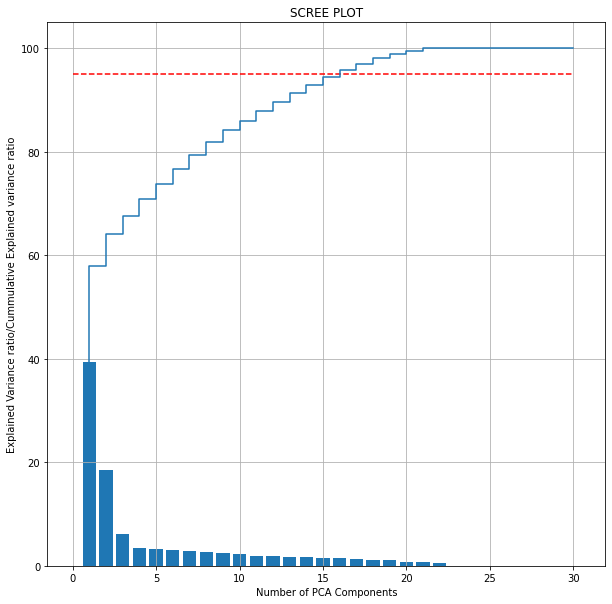

In [582]:
plt.figure(figsize=(10,10))
plt.title('SCREE PLOT')
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance ratio/Cummulative Explained variance ratio')
plt.bar(range(1,31),pca.explained_variance_ratio_*100)
plt.plot([0,30],[95,95],'r--')
plt.step(range(1,31),np.cumsum(pca.explained_variance_ratio_*100))
plt.grid(True)

In [368]:
# from the above plot we can see that 95% of variation is explained by 16 components.
# hence we can use 16 components to built PCA

In [369]:
# PCA with 16 components

In [583]:
pca16=PCA(n_components=16)

In [584]:
pca16_data=pca16.fit_transform(x)
pca16_data=pd.DataFrame(pca16_data,columns=range(1,17))
pca16_data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.422621,2.908008,-0.462083,-0.280209,0.641200,-0.384645,-0.578799,-0.434831,0.416055,-0.570549,-0.026231,0.104420,-0.291035,-0.308965,-0.088321,-0.114866
1,1.377857,-0.168868,-0.118954,0.538342,-0.384392,0.507606,-0.179201,0.191339,0.806606,-0.082728,0.361905,-0.668068,0.545034,0.270869,-0.616208,-0.342448
2,0.578992,-0.335513,-0.575583,0.030874,0.571226,0.587855,-0.913455,0.289817,0.096044,0.239903,0.672826,0.603267,0.004963,0.056798,0.251216,0.465454
3,-0.968216,-1.566139,0.146075,0.393675,0.447256,-0.406770,0.347665,-0.277210,0.088888,0.065951,-0.362404,0.034364,0.045157,-0.119867,0.016114,-0.137844
4,-1.057597,-1.398650,0.705135,0.200467,-0.052986,-0.495676,-0.068277,-0.312473,-0.577748,-0.668049,-0.480937,0.126270,-0.129546,0.977569,0.055751,-0.491619


In [585]:
x3_train,x3_test,y3_train,y3_test=train_test_split(pca16_data,y,test_size=0.3,random_state=10)

In [586]:
lr=LogisticRegression()

In [587]:
lr.fit(x3_train,y3_train)

LogisticRegression()

In [588]:
y_train_pred=lr.predict(x3_train)

In [589]:
print('Train accuracy with PCA',accuracy_score(y3_train,y_train_pred))

Train accuracy with PCA 0.7928400954653938


In [590]:
y_test_pred=lr.predict(x3_test)

In [591]:
print('Test accuracy with PCA',accuracy_score(y3_test,y_test_pred))

Test accuracy with PCA 0.8145879732739421


In [592]:
print(classification_report(y3_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1314
           1       0.69      0.56      0.62       482

    accuracy                           0.81      1796
   macro avg       0.77      0.73      0.75      1796
weighted avg       0.81      0.81      0.81      1796



In [593]:
print('Roc_auc score: ',roc_auc_score(y1_test,y1_test_pred))

Roc_auc score:  0.8275081794231605


In [379]:
# with PCA transformed data the train accuracy is increased from 81% to 82%

In [380]:
# XGboost on PCA data with 16 components

In [594]:
xgb=XGBClassifier()

In [595]:
xgb.fit(x3_train,y3_train)

[02:55:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [596]:
y_train_pred=xgb.predict(x3_train)

In [597]:
print('Train accuracy with PCA',accuracy_score(y3_train,y_train_pred))

Train accuracy with PCA 0.9947494033412888


In [598]:
y_test_pred=xgb.predict(x3_test)

In [599]:
print('Test accuracy with PCA',accuracy_score(y3_test,y_test_pred))

Test accuracy with PCA 0.782293986636971


In [600]:
print(classification_report(y3_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1314
           1       0.63      0.47      0.54       482

    accuracy                           0.78      1796
   macro avg       0.72      0.68      0.70      1796
weighted avg       0.77      0.78      0.77      1796



In [602]:
print('Roc_auc score: ',roc_auc_score(y3_test,y_test_pred))

Roc_auc score:  0.6837267979057328


In [387]:
# the XGB on PCA data is not performing better than the base model
# it is good but comaparing to the base model it is the same

In [388]:
# stacking classifier with base estimator as logistic and KKN
# final estimator as XGB

In [389]:
base_estimators=[('knn',KNeighborsClassifier()),
                 ('logistic_reg',LogisticRegression())]

In [390]:
xgb=XGBClassifier()

In [391]:
kf=KFold(n_splits=5,shuffle=True,random_state=1)

In [392]:
sc=StackingClassifier(estimators=base_estimators,final_estimator=xgb,cv=kf,n_jobs=-1,verbose=2)

In [393]:
sc.fit(x3_train,y3_train)

[19:12:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimators=[('knn', KNeighborsClassifier()),
                               ('logistic_reg', LogisticRegression())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 gamma=None, gpu_id=None,
                                                 importance_type='gain',
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 min_child_weight=

In [394]:
y3_train_pred=sc.predict(x3_train)

In [395]:
print('Train accuracy',accuracy_score(y3_train,y3_train_pred))

Train accuracy 0.7852028639618138


In [396]:
y3_test_pred=sc.predict(x3_test)

In [397]:
print('Test accuracy',accuracy_score(y3_test,y3_test_pred))

Test accuracy 0.7806236080178174


In [398]:
print(classification_report(y3_test,y3_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1314
           1       0.62      0.48      0.54       482

    accuracy                           0.78      1796
   macro avg       0.72      0.68      0.70      1796
weighted avg       0.77      0.78      0.77      1796



In [400]:
print(roc_auc_score(y3_test,y3_test_pred))

0.6845557260779225


In [399]:
# stacking classifier with base models as Logistic knn and final estimator as XGB
# the model is not performing good
# the precission and recall is getting affected
# the precision and recall for class 1 is less

# PCA Balanced dataset

In [603]:
x_sm.shape

(8798, 30)

In [604]:
pca_data=pca.fit_transform(x_sm)
pca_data=pd.DataFrame(pca_data,columns=range(1,31))
pca_data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,-1.102335,3.246878,-0.713420,0.290220,0.757179,0.067813,-0.400333,-0.004231,0.994075,0.051520,-0.207407,-0.152240,0.147403,-0.352747,-0.194142,0.001368,0.018533,0.196441,-0.078338,-0.332112,-0.316212,-0.278194,-0.012438,-0.000140,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000
1,1.413413,0.049419,0.085311,-0.066933,-0.819947,-0.314618,-0.250098,-0.598809,0.035135,0.449140,-0.458697,-0.518913,-0.640311,0.424197,-0.646992,-0.297223,0.561227,0.048527,-0.042457,0.221221,-0.092222,-0.242493,-0.065272,0.000483,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000
2,0.622628,-0.114142,-0.407728,0.244252,0.297478,-0.788108,-0.850684,-0.404555,0.152520,0.245728,0.864108,0.299194,-0.064148,0.051119,0.313867,0.163772,0.196243,-0.114098,0.043787,-0.088936,0.377554,-0.001473,-0.028641,-0.000503,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000
3,-1.046037,-1.154293,0.246809,0.587562,0.111335,0.430747,0.355211,-0.070831,0.040089,-0.187004,-0.324595,0.164338,0.055938,-0.074638,0.075262,0.230289,-0.696956,-0.096070,-0.618310,0.206200,0.043581,0.089628,-0.005170,0.000594,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000
4,-1.158987,-0.919811,0.750705,0.107582,0.042698,0.491304,-0.033836,0.917449,0.231480,-0.109924,-0.310102,-0.052199,0.458039,0.895958,0.003738,-0.657576,-0.234457,-0.058959,-0.297427,0.142773,0.096211,-0.028118,-0.047747,-0.000396,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000


In [605]:
sorted(pca.explained_variance_ratio_,reverse=True)

[0.3722493045324693,
 0.19727788375194652,
 0.06347125109537168,
 0.03610867765557551,
 0.03405968525826298,
 0.032807369846837714,
 0.030808918142044506,
 0.025150443974200656,
 0.02265446699439948,
 0.021630196283460103,
 0.020206597977878788,
 0.0192123773874753,
 0.01879370852611755,
 0.017868786799492546,
 0.01640420550230312,
 0.014624470713921027,
 0.014170012810152913,
 0.01204243906944328,
 0.010378382503638223,
 0.007918107676710978,
 0.006916951387289065,
 0.004877884741880191,
 0.0003454505273875182,
 2.2426841740999637e-05,
 3.076083062549668e-33,
 1.447397838982373e-33,
 1.447397838982373e-33,
 1.447397838982373e-33,
 1.447397838982373e-33,
 1.447397838982373e-33]

In [606]:
pca.explained_variance_ratio_

array([3.72249305e-01, 1.97277884e-01, 6.34712511e-02, 3.61086777e-02,
       3.40596853e-02, 3.28073698e-02, 3.08089181e-02, 2.51504440e-02,
       2.26544670e-02, 2.16301963e-02, 2.02065980e-02, 1.92123774e-02,
       1.87937085e-02, 1.78687868e-02, 1.64042055e-02, 1.46244707e-02,
       1.41700128e-02, 1.20424391e-02, 1.03783825e-02, 7.91810768e-03,
       6.91695139e-03, 4.87788474e-03, 3.45450527e-04, 2.24268417e-05,
       3.07608306e-33, 1.44739784e-33, 1.44739784e-33, 1.44739784e-33,
       1.44739784e-33, 1.44739784e-33])

In [607]:
np.cumsum(pca.explained_variance_ratio_*100)

array([ 37.22493045,  56.95271883,  63.29984394,  66.9107117 ,
        70.31668023,  73.59741721,  76.67830903,  79.19335343,
        81.45880013,  83.62181975,  85.64247955,  87.56371729,
        89.44308814,  91.22996682,  92.87038737,  94.33283444,
        95.74983573,  96.95407963,  97.99191788,  98.78372865,
        99.47542379,  99.96321226,  99.99775732, 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        ])

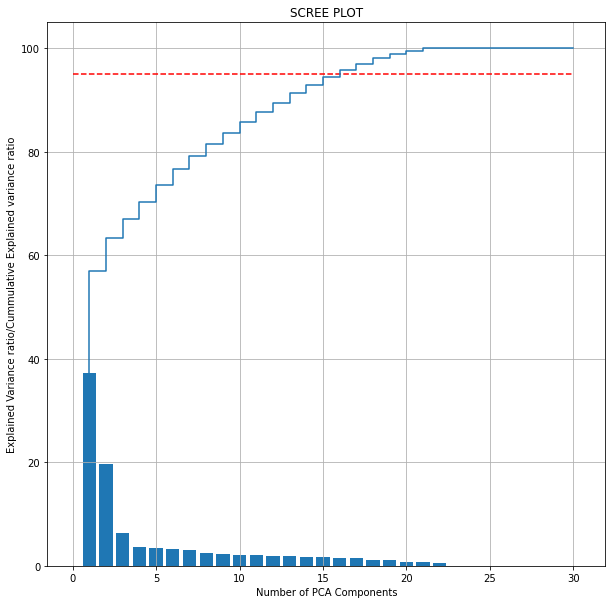

In [608]:
plt.figure(figsize=(10,10))
plt.title('SCREE PLOT')
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance ratio/Cummulative Explained variance ratio')
plt.bar(range(1,31),pca.explained_variance_ratio_*100)
plt.plot([0,30],[95,95],'r--')
plt.step(range(1,31),np.cumsum(pca.explained_variance_ratio_*100))
plt.grid(True)

In [368]:
# from the above plot we can see that 95% of variation is explained by 17 components.
# hence we can use 17 components to built PCA

In [369]:
# PCA with 17 components

In [609]:
pca16=PCA(n_components=17)

In [610]:
pca16_data=pca16.fit_transform(x_sm)
pca16_data=pd.DataFrame(pca16_data,columns=range(1,18))
pca16_data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.102335,3.246878,-0.713420,0.290220,0.757179,0.067813,-0.400333,-0.004231,0.994075,0.051520,-0.207407,-0.152240,0.147403,-0.352747,-0.194142,0.001368,0.018533
1,1.413413,0.049419,0.085311,-0.066933,-0.819947,-0.314618,-0.250098,-0.598809,0.035135,0.449140,-0.458697,-0.518913,-0.640311,0.424197,-0.646992,-0.297223,0.561227
2,0.622628,-0.114142,-0.407728,0.244252,0.297478,-0.788108,-0.850684,-0.404555,0.152520,0.245728,0.864108,0.299194,-0.064148,0.051119,0.313867,0.163772,0.196243
3,-1.046037,-1.154293,0.246809,0.587562,0.111335,0.430747,0.355211,-0.070831,0.040089,-0.187004,-0.324595,0.164338,0.055938,-0.074638,0.075262,0.230289,-0.696956
4,-1.158987,-0.919811,0.750705,0.107582,0.042698,0.491304,-0.033836,0.917449,0.231480,-0.109924,-0.310102,-0.052199,0.458039,0.895958,0.003738,-0.657576,-0.234457


In [611]:
x3_train,x3_test,y3_train,y3_test=train_test_split(pca16_data,y_sm,test_size=0.3,random_state=10)

In [612]:
lr=LogisticRegression()

In [613]:
lr.fit(x3_train,y3_train)

LogisticRegression()

In [614]:
y_train_pred=lr.predict(x3_train)

In [615]:
print('Train accuracy with PCA',accuracy_score(y3_train,y_train_pred))

Train accuracy with PCA 0.7679441377070477


In [616]:
y_test_pred=lr.predict(x3_test)

In [617]:
print('Test accuracy with PCA',accuracy_score(y3_test,y_test_pred))

Test accuracy with PCA 0.7844696969696969


In [618]:
print(classification_report(y3_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1343
           1       0.76      0.81      0.79      1297

    accuracy                           0.78      2640
   macro avg       0.79      0.78      0.78      2640
weighted avg       0.79      0.78      0.78      2640



In [524]:
print('Roc_auc score: ',roc_auc_score(y1_test,y1_test_pred))

Roc_auc score:  0.821453483065049


In [379]:
# with PCA transformed data on balanced data the model is not performing good

In [380]:
# XGboost on PCA data with 17 components

In [619]:
xgb=XGBClassifier()

In [620]:
xgb.fit(x3_train,y3_train)

[02:57:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [621]:
y_train_pred=xgb.predict(x3_train)

In [622]:
print('Train accuracy with PCA',accuracy_score(y3_train,y_train_pred))

Train accuracy with PCA 0.9840857421240663


In [623]:
y_test_pred=xgb.predict(x3_test)

In [624]:
print('Test accuracy with PCA',accuracy_score(y3_test,y_test_pred))

Test accuracy with PCA 0.8098484848484848


In [625]:
print(classification_report(y3_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.80      1343
           1       0.78      0.86      0.82      1297

    accuracy                           0.81      2640
   macro avg       0.81      0.81      0.81      2640
weighted avg       0.81      0.81      0.81      2640



In [626]:
print('Roc_auc score: ',roc_auc_score(y3_test,y_test_pred))

Roc_auc score:  0.8106226006403459


In [387]:
# the XGB on PCA balanced data is getting overfitted. The train accuracy is higher than the test accuracy

In [388]:
# stacking classifier with base estimator as logistic and KKN
# final estimator as XGB

In [533]:
base_estimators=[('knn',KNeighborsClassifier()),
                 ('logistic_reg',LogisticRegression())]

In [534]:
xgb=XGBClassifier()

In [535]:
kf=KFold(n_splits=5,shuffle=True,random_state=1)

In [536]:
sc=StackingClassifier(estimators=base_estimators,final_estimator=xgb,cv=kf,n_jobs=-1,verbose=2)

In [538]:
sc.fit(x3_train,y3_train)

[01:24:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimators=[('knn', KNeighborsClassifier()),
                               ('logistic_reg', LogisticRegression())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 gamma=None, gpu_id=None,
                                                 importance_type='gain',
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 min_child_weight=

In [539]:
y3_train_pred=sc.predict(x3_train)

In [540]:
print('Train accuracy',accuracy_score(y3_train,y3_train_pred))

Train accuracy 0.837447223124391


In [541]:
y3_test_pred=sc.predict(x3_test)

In [542]:
print('Test accuracy',accuracy_score(y3_test,y3_test_pred))

Test accuracy 0.793939393939394


In [543]:
print(classification_report(y3_test,y3_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1343
           1       0.77      0.83      0.80      1297

    accuracy                           0.79      2640
   macro avg       0.80      0.79      0.79      2640
weighted avg       0.80      0.79      0.79      2640



In [544]:
print(roc_auc_score(y3_test,y3_test_pred))

0.7945766362721465


In [ ]:
# the model is not performing good because the base model has greater accuracy than this